K-Nearest Neighbors

#Task 1
Generating data

TASK 1: GENERATING DATA

Generated 50 points in unit square [0,1] x [0,1]

Boundary Rule:
  - If y > x  → BLUE
  - If y ≤ x  → ORANGE

Data shape: (50, 2)
Number of blue points: 29
Number of orange points: 21

First 5 data points:
   x      y     label
------------------------------
0.375  0.970  blue
0.951  0.775  orange
0.732  0.939  blue
0.599  0.895  blue
0.156  0.598  blue


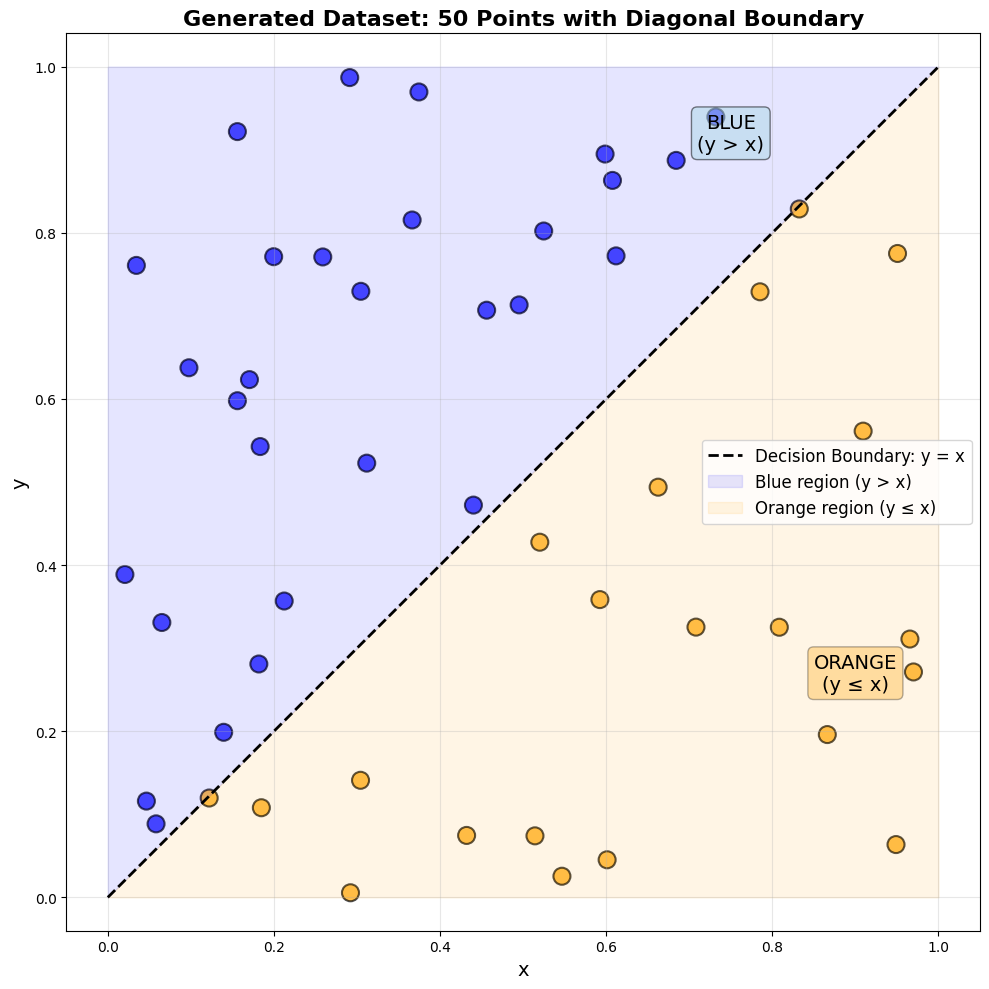

TASK 1 COMPLETED!

Key Points:
  ✓ Generated 50 random points in unit square
  ✓ Applied boundary rule: y = x
  ✓ Stored data in structured format (numpy array)
  ✓ Visualized the dataset with color-coded labels


In [4]:
import numpy as np
import matplotlib.pyplot as plt

print("TASK 1: GENERATING DATA")

# Set random seed for reproducibility
np.random.seed(42)
# Generate 50 points in a unit square [0,1] x [0,1]
n = 50
x_coords = np.random.uniform(0, 1, n)
y_coords = np.random.uniform(0, 1, n)

# Boundary rule: points above the line y = x are BLUE, below are ORANGE
# This creates a diagonal boundary
labels = np.where(y_coords > x_coords, 'blue', 'orange')

# Store data in structured format (numpy array)
data = np.column_stack((x_coords, y_coords))

print(f"\nGenerated {n} points in unit square [0,1] x [0,1]")
print(f"\nBoundary Rule:")
print("  - If y > x  → BLUE")
print("  - If y ≤ x  → ORANGE")
print(f"\nData shape: {data.shape}")
print(f"Number of blue points: {np.sum(labels == 'blue')}")
print(f"Number of orange points: {np.sum(labels == 'orange')}")

print("\nFirst 5 data points:")
print("   x      y     label")
print("-" * 30)
for i in range(5):
    print(f"{x_coords[i]:.3f}  {y_coords[i]:.3f}  {labels[i]}")

# Visualize the dataset
plt.figure(figsize=(10, 10))
# Plot points with their respective colors
colors = ['orange' if label == 'orange' else 'blue' for label in labels]
plt.scatter(x_coords, y_coords, c=colors, s=150, alpha=0.7, edgecolors='black', linewidths=1.5)

# Draw the decision boundary (y = x)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Decision Boundary: y = x')

# Add shaded regions to show class areas
x_fill = np.array([0, 1, 1, 0])
y_fill_blue = np.array([0, 1, 1, 0])
y_fill_orange = np.array([0, 0, 1, 1])

plt.fill_between([0, 1], [0, 1], [1, 1], alpha=0.1, color='blue', label='Blue region (y > x)')
plt.fill_between([0, 1], [0, 0], [0, 1], alpha=0.1, color='orange', label='Orange region (y ≤ x)')

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Generated Dataset: 50 Points with Diagonal Boundary', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('equal')

# Add text annotations
plt.text(0.75, 0.9, 'BLUE\n(y > x)', fontsize=14, ha='center', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
plt.text(0.9, 0.25, 'ORANGE\n(y ≤ x)', fontsize=14, ha='center',
         bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))

plt.tight_layout()
plt.show()
print("TASK 1 COMPLETED!")

print("\nKey Points:")
print("  ✓ Generated 50 random points in unit square")
print("  ✓ Applied boundary rule: y = x")
print("  ✓ Stored data in structured format (numpy array)")
print("  ✓ Visualized the dataset with color-coded labels")

#task2 
The algorithm


TASK 2: THE KNN ALGORITHM

Distance Metrics:
  1. EUCLIDEAN: √((x₁-x₂)² + (y₁-y₂)²) - straight line distance
  2. MANHATTAN: |x₁-x₂| + |y₁-y₂| - grid/city block distance
NEW OBSERVATION: (0.3, 0.7)

Example: Distance calculations to first 5 points:
Point    Coordinates    Distance (Euclidean)    Label
  1      (0.375, 0.970)         0.2797              blue
  2      (0.951, 0.775)         0.6550              orange
  3      (0.732, 0.939)         0.4939              blue
  4      (0.599, 0.895)         0.3566              blue
  5      (0.156, 0.598)         0.1765              blue
TESTING DIFFERENT K VALUES

K = 1:
  Blue votes: 1
  Orange votes: 0
  → PREDICTION: BLUE

K = 3:
  Blue votes: 3
  Orange votes: 0
  → PREDICTION: BLUE

K = 5:
  Blue votes: 5
  Orange votes: 0
  → PREDICTION: BLUE

K = 10:
  Blue votes: 10
  Orange votes: 0
  → PREDICTION: BLUE

K = 20:
  Blue votes: 19
  Orange votes: 1
  → PREDICTION: BLUE


C:\Users\Aitzh\AppData\Local\Temp\ipykernel_10000\1889272634.py:111: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(new_point[0], new_point[1], c=color_new, s=500, marker='',


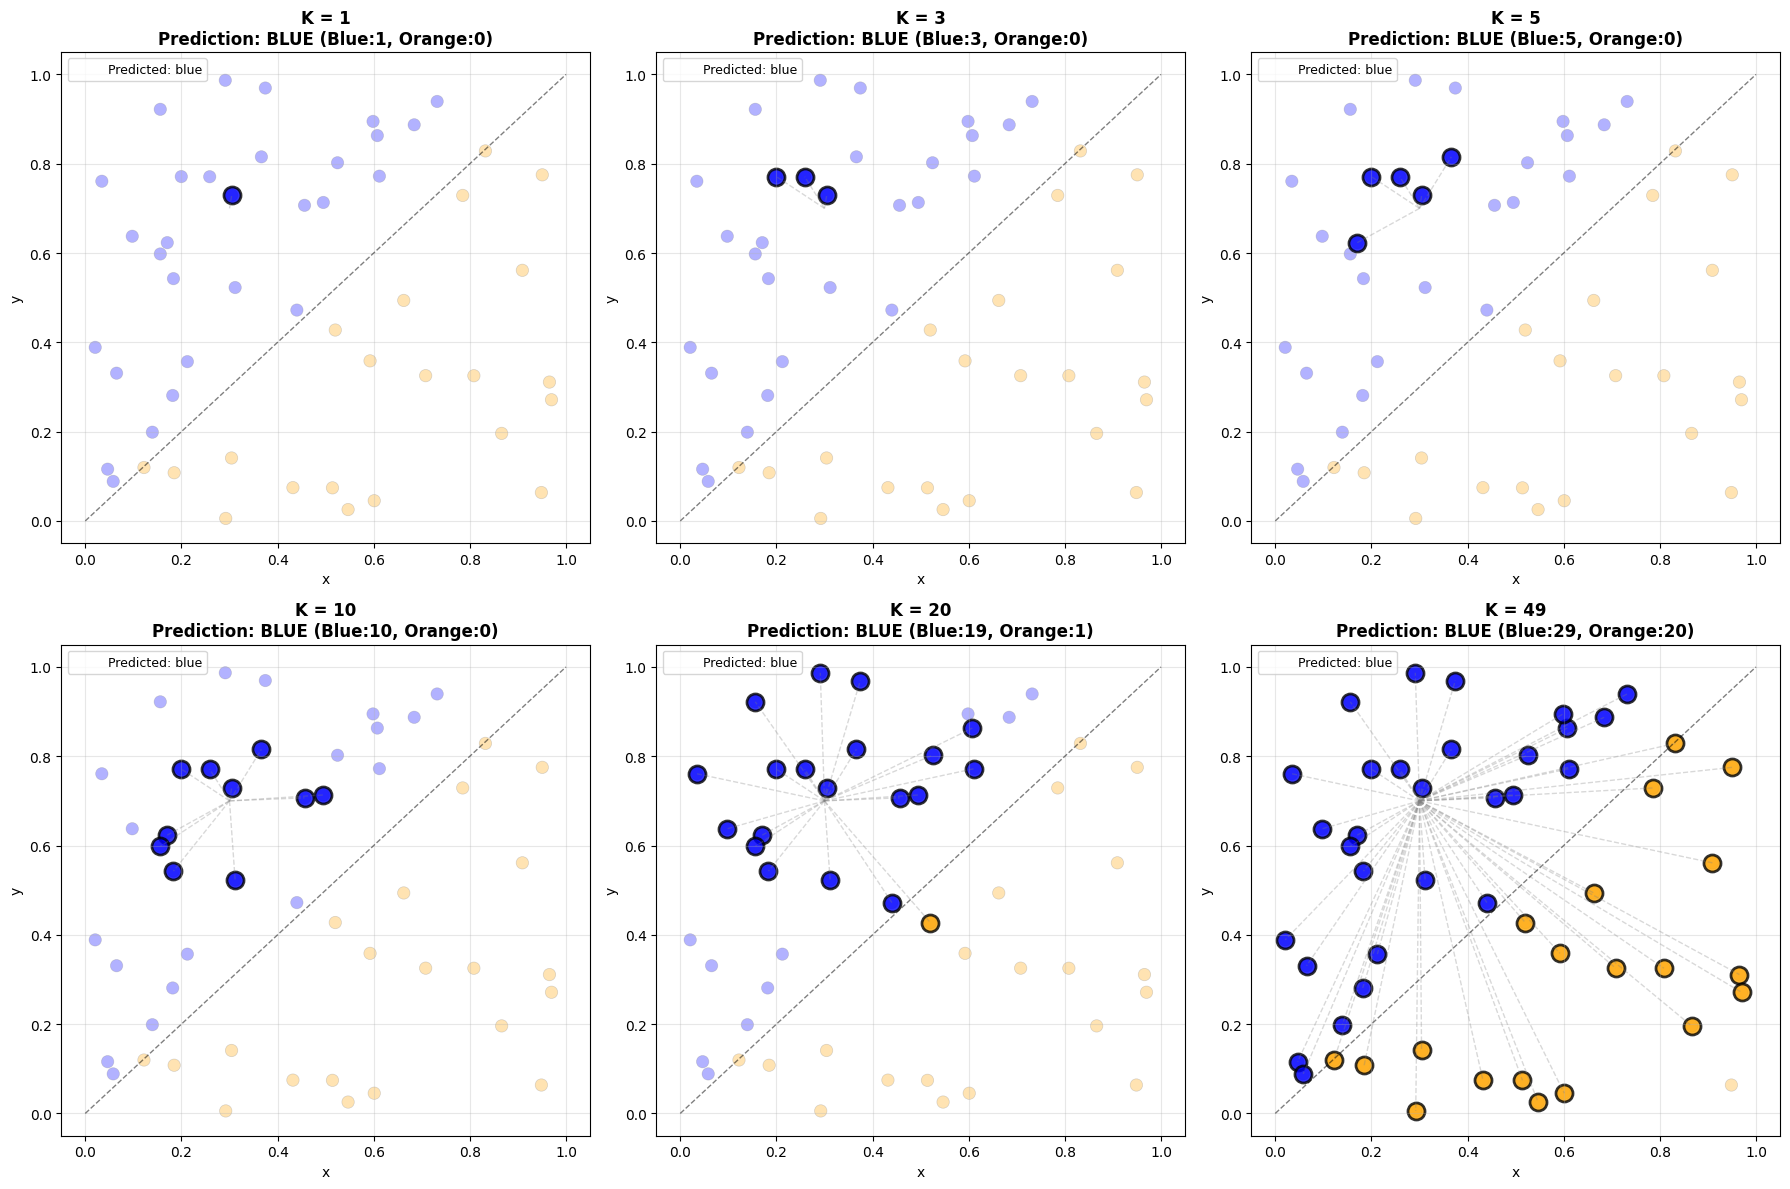

ANALYSIS: EFFECT OF K VALUE

1. K TOO SMALL (K=1):
   ✗ Very sensitive to noise and outliers
   ✗ Can lead to OVERFITTING
   ✗ Decision boundary is very irregular
   ✗ Poor generalization to new data

2. K TOO LARGE (K=49, nearly all points):
   ✗ May include many irrelevant distant points
   ✗ Can lead to UNDERFITTING
   ✗ Loses local structure of data
   ✗ Prediction becomes too generalized

3. OPTIMAL K (K=3 to K=11, typically odd):
   ✓ Balances bias and variance
   ✓ Captures local patterns without overfitting
   ✓ Odd K avoids ties in binary classification
   ✓ Usually determined by cross-validation

4. DECISION APPROACH (Majority Voting):
   - Count the labels of K nearest neighbors
   - Assign the most common label to the new point
   - In case of tie (even K), can use distance weighting
COMPARING DISTANCE METRICS

For K=5 and new point (0.3, 0.7):

Euclidean Distance:
  Prediction: BLUE
  Nearest neighbors:
    Point (0.305, 0.730): distance=0.0300, label=blue
    Point (0.259

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

print("TASK 2: THE KNN ALGORITHM")


# First, regenerate the data from Task 1
np.random.seed(42)
n = 50
x_coords = np.random.uniform(0, 1, n)
y_coords = np.random.uniform(0, 1, n)
labels = np.where(y_coords > x_coords, 'blue', 'orange')
data = np.column_stack((x_coords, y_coords))

# Define distance functions
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

print("\nDistance Metrics:")
print("  1. EUCLIDEAN: √((x₁-x₂)² + (y₁-y₂)²) - straight line distance")
print("  2. MANHATTAN: |x₁-x₂| + |y₁-y₂| - grid/city block distance")

# KNN prediction function
def knn_predict(new_point, data, labels, k, distance_metric='euclidean'):

    # Step 1: Calculate distances
    distances = []
    for i, point in enumerate(data):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(new_point, point)
        else:
            dist = manhattan_distance(new_point, point)
        distances.append((dist, labels[i], i))
    
    # Step 2: Sort by distance
    distances.sort(key=lambda x: x[0])
    
    # Step 3: Get K nearest neighbors
    k_nearest = distances[:k]
    
    # Step 4: Majority voting
    neighbor_labels = [label for _, label, _ in k_nearest]
    vote_counts = Counter(neighbor_labels)
    prediction = vote_counts.most_common(1)[0][0]
    
    return prediction, k_nearest

# Test with a new observation
new_point = np.array([0.3, 0.7])
print(f"NEW OBSERVATION: ({new_point[0]}, {new_point[1]})")


# Calculate distances to first 5 points as example
print("\nExample: Distance calculations to first 5 points:")
print("Point    Coordinates    Distance (Euclidean)    Label")
for i in range(5):
    point = data[i]
    dist = euclidean_distance(new_point, point)
    print(f"  {i+1}      ({point[0]:.3f}, {point[1]:.3f})         {dist:.4f}              {labels[i]}")

# Test different K values
print("TESTING DIFFERENT K VALUES")

k_values = [1, 3, 5, 10, 20]

for k in k_values:
    prediction, neighbors = knn_predict(new_point, data, labels, k)
    
    # Count votes
    blue_votes = sum(1 for _, label, _ in neighbors if label == 'blue')
    orange_votes = sum(1 for _, label, _ in neighbors if label == 'orange')
    
    print(f"\nK = {k}:")
    print(f"  Blue votes: {blue_votes}")
    print(f"  Orange votes: {orange_votes}")
    print(f"  → PREDICTION: {prediction.upper()}")

# Visualize predictions with different K values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

k_values_viz = [1, 3, 5, 10, 20, 49]

for idx, k in enumerate(k_values_viz):
    ax = axes[idx]
    
    # Plot all training points (smaller and transparent)
    colors_plot = ['orange' if label == 'orange' else 'blue' for label in labels]
    ax.scatter(x_coords, y_coords, c=colors_plot, s=80, alpha=0.3, edgecolors='gray', linewidths=0.5)
    
    # Get prediction and neighbors
    prediction, neighbors = knn_predict(new_point, data, labels, k)
    
    # Highlight K nearest neighbors
    for dist, label, idx_neighbor in neighbors:
        neighbor_color = 'orange' if label == 'orange' else 'blue'
        ax.scatter(x_coords[idx_neighbor], y_coords[idx_neighbor], 
                  c=neighbor_color, s=150, alpha=0.8, 
                  edgecolors='black', linewidths=2)
        # Draw line to new point
        ax.plot([new_point[0], x_coords[idx_neighbor]], 
                [new_point[1], y_coords[idx_neighbor]], 
                'gray', alpha=0.3, linewidth=1, linestyle='--')
    
    # Plot the new point as a star
    color_new = 'orange' if prediction == 'orange' else 'blue'
    ax.scatter(new_point[0], new_point[1], c=color_new, s=500, marker='', 
               edgecolors='black', linewidths=3, label=f'Predicted: {prediction}', zorder=10)
    
    # Draw decision boundary
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5)
    
    # Count votes
    blue_votes = sum(1 for _, label, _ in neighbors if label == 'blue')
    orange_votes = sum(1 for _, label, _ in neighbors if label == 'orange')
    
    ax.set_title(f'K = {k}\nPrediction: {prediction.upper()} (Blue:{blue_votes}, Orange:{orange_votes})', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Analysis of K values
print("ANALYSIS: EFFECT OF K VALUE")

print("\n1. K TOO SMALL (K=1):")
print("   ✗ Very sensitive to noise and outliers")
print("   ✗ Can lead to OVERFITTING")
print("   ✗ Decision boundary is very irregular")
print("   ✗ Poor generalization to new data")

print("\n2. K TOO LARGE (K=49, nearly all points):")
print("   ✗ May include many irrelevant distant points")
print("   ✗ Can lead to UNDERFITTING")
print("   ✗ Loses local structure of data")
print("   ✗ Prediction becomes too generalized")

print("\n3. OPTIMAL K (K=3 to K=11, typically odd):")
print("   ✓ Balances bias and variance")
print("   ✓ Captures local patterns without overfitting")
print("   ✓ Odd K avoids ties in binary classification")
print("   ✓ Usually determined by cross-validation")

print("\n4. DECISION APPROACH (Majority Voting):")
print("   - Count the labels of K nearest neighbors")
print("   - Assign the most common label to the new point")
print("   - In case of tie (even K), can use distance weighting")

# Compare distance metrics for the new point

print("COMPARING DISTANCE METRICS")
k = 5
pred_euclidean, neighbors_euc = knn_predict(new_point, data, labels, k, 'euclidean')
pred_manhattan, neighbors_man = knn_predict(new_point, data, labels, k, 'manhattan')

print(f"\nFor K={k} and new point ({new_point[0]}, {new_point[1]}):")
print(f"\nEuclidean Distance:")
print(f"  Prediction: {pred_euclidean.upper()}")
print(f"  Nearest neighbors:")
for dist, label, idx in neighbors_euc[:5]:
    print(f"    Point ({x_coords[idx]:.3f}, {y_coords[idx]:.3f}): distance={dist:.4f}, label={label}")

print(f"\nManhattan Distance:")
print(f"  Prediction: {pred_manhattan.upper()}")
print(f"  Nearest neighbors:")
for dist, label, idx in neighbors_man[:5]:
    print(f"    Point ({x_coords[idx]:.3f}, {y_coords[idx]:.3f}): distance={dist:.4f}, label={label}")

print("TASK 2 COMPLETED!")


#Task 3
KNN for non linear patterns

TASK 3: KNN FOR NON-LINEAR PATTERNS

1. GENERATING NON-LINEAR DATASET: CONCENTRIC CIRCLES
Generated 100 points in concentric circles
  Inner circle (BLUE): 50 points, radius 0.1-0.3
  Outer ring (ORANGE): 50 points, radius 0.4-0.5

This pattern is NOT linearly separable!
A straight line cannot separate these two classes.


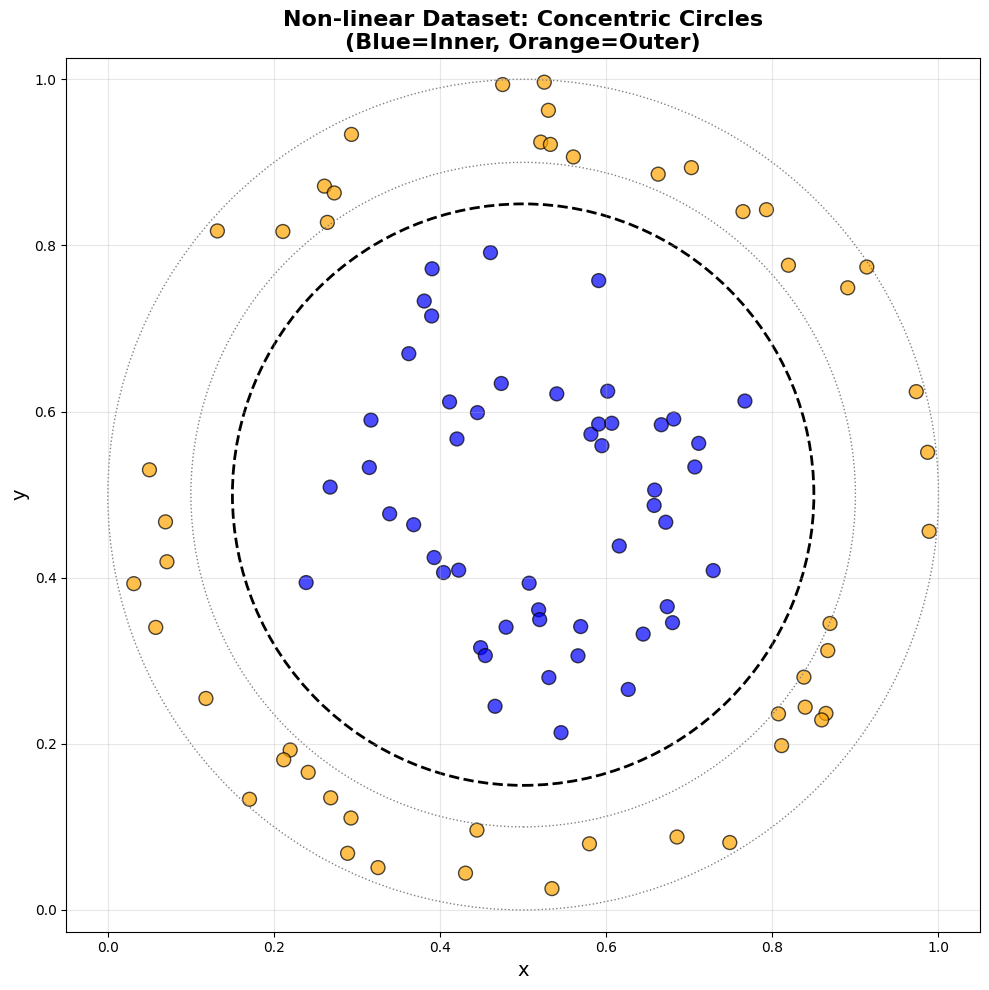

2. GENERATING TEST SET AND MEASURING PERFORMANCE

Generated 50 test points
True labels based on distance from center:
  - Distance < 0.35 → BLUE (inner)
  - Distance ≥ 0.35 → ORANGE (outer)
TESTING DIFFERENT K VALUES

K = 1:
  Euclidean - Accuracy: 0.940, Precision: 0.889, Recall: 0.941
  Manhattan - Accuracy: 0.960, Precision: 0.941, Recall: 0.941

K = 3:
  Euclidean - Accuracy: 0.920, Precision: 0.933, Recall: 0.824
  Manhattan - Accuracy: 0.940, Precision: 0.938, Recall: 0.882

K = 5:
  Euclidean - Accuracy: 0.940, Precision: 0.938, Recall: 0.882
  Manhattan - Accuracy: 0.920, Precision: 0.933, Recall: 0.824

K = 7:
  Euclidean - Accuracy: 0.940, Precision: 0.938, Recall: 0.882
  Manhattan - Accuracy: 0.900, Precision: 0.875, Recall: 0.824

K = 11:
  Euclidean - Accuracy: 0.920, Precision: 0.882, Recall: 0.882
  Manhattan - Accuracy: 0.900, Precision: 0.875, Recall: 0.824

K = 15:
  Euclidean - Accuracy: 0.880, Precision: 0.789, Recall: 0.882
  Manhattan - Accuracy: 0.880, Precision

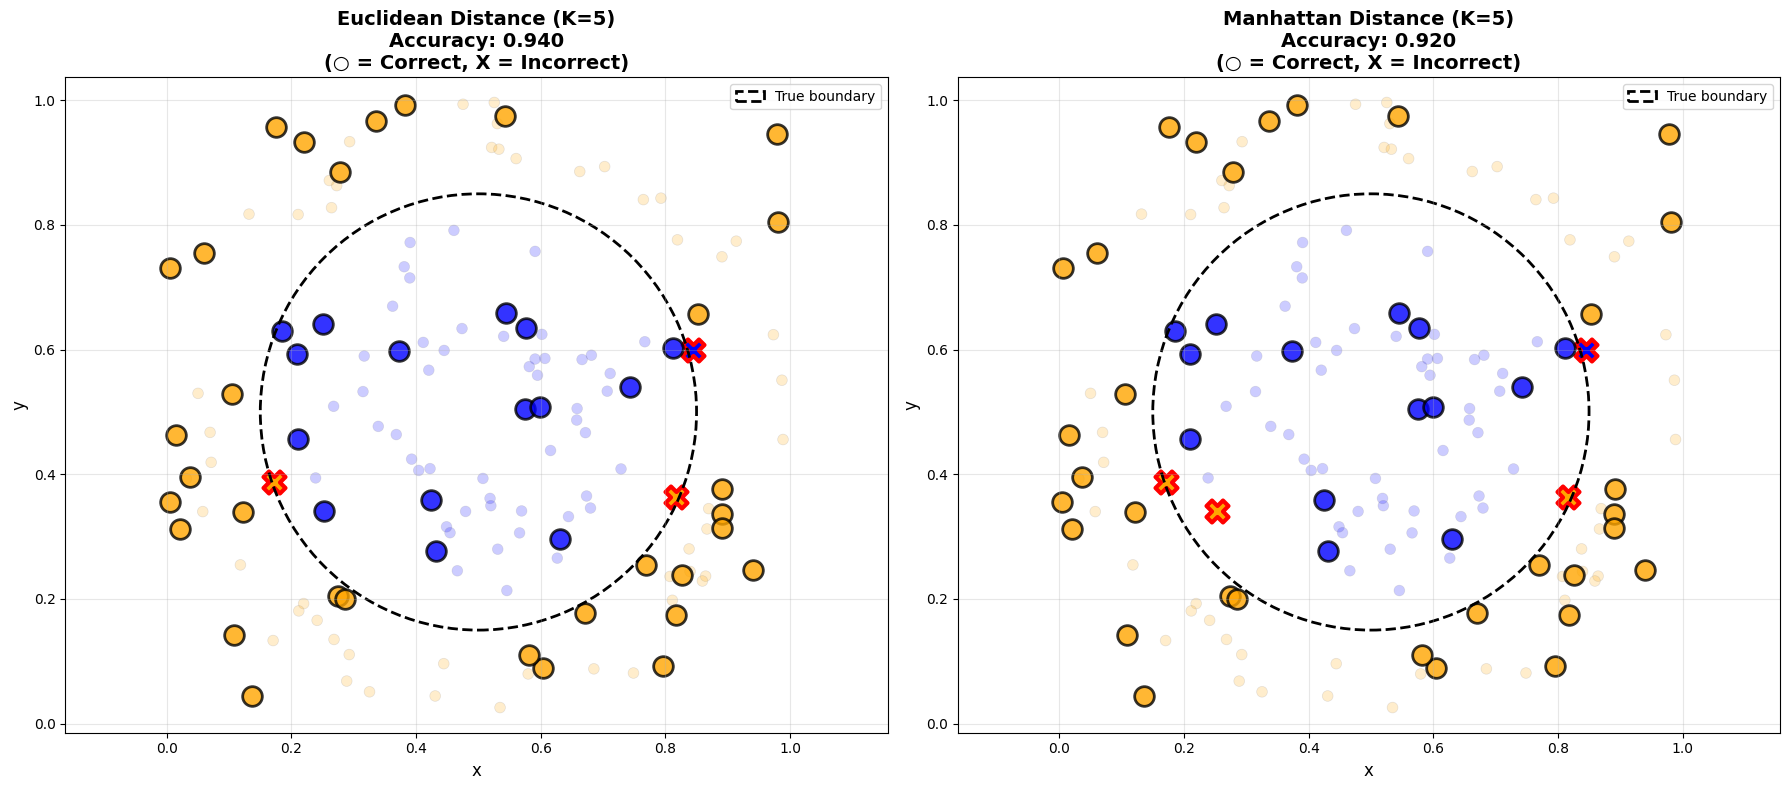

ANALYSIS: DISTANCE METRICS FOR NON-LINEAR PATTERNS

1. EUCLIDEAN DISTANCE:
   ✓ Measures straight-line distance
   ✓ BEST for circular/spherical patterns
   ✓ Natural choice for geometric problems
   ✓ Formula: √((x₁-x₂)² + (y₁-y₂)²)
   ✓ Accuracy on concentric circles: 0.940

2. MANHATTAN DISTANCE:
   ✓ Measures grid-like distance (taxi cab)
   ✓ Better for grid-aligned patterns
   ✓ Less sensitive to outliers
   ✓ Formula: |x₁-x₂| + |y₁-y₂|
   ✓ Accuracy on concentric circles: 0.920

3. WHICH METRIC IS MORE APPROPRIATE?
   For concentric circles: EUCLIDEAN is better because:
   - The pattern is based on radial distance from center
   - Euclidean naturally measures radius
   - Manhattan would measure diagonal distance differently

4. EFFECT OF COMPLEX DATASET STRUCTURE:
   As datasets become more complex:
   ✓ KNN still works well (non-parametric)
   ✓ May need larger K for stability
   ✓ Choice of distance metric becomes critical
   ✗ Computation becomes slower (more points to compar

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

print("TASK 3: KNN FOR NON-LINEAR PATTERNS")

# Distance functions (from Task 2)
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def knn_predict(new_point, data, labels, k, distance_metric='euclidean'):
    distances = []
    for i, point in enumerate(data):
        if distance_metric == 'euclidean':
            dist = euclidean_distance(new_point, point)
        else:
            dist = manhattan_distance(new_point, point)
        distances.append((dist, labels[i]))
    
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    neighbor_labels = [label for _, label in k_nearest]
    prediction = Counter(neighbor_labels).most_common(1)[0][0]
    
    return prediction

print("\n1. GENERATING NON-LINEAR DATASET: CONCENTRIC CIRCLES")


np.random.seed(42)
n_samples = 100

# Inner circle - BLUE class
r_inner = np.random.uniform(0.1, 0.3, n_samples//2)
theta_inner = np.random.uniform(0, 2*np.pi, n_samples//2)
x_inner = 0.5 + r_inner * np.cos(theta_inner)
y_inner = 0.5 + r_inner * np.sin(theta_inner)
labels_inner = np.array(['blue'] * (n_samples//2))

# Outer ring - ORANGE class
r_outer = np.random.uniform(0.4, 0.5, n_samples//2)
theta_outer = np.random.uniform(0, 2*np.pi, n_samples//2)
x_outer = 0.5 + r_outer * np.cos(theta_outer)
y_outer = 0.5 + r_outer * np.sin(theta_outer)
labels_outer = np.array(['orange'] * (n_samples//2))

# Combine datasets
x_circle = np.concatenate([x_inner, x_outer])
y_circle = np.concatenate([y_inner, y_outer])
labels_circle = np.concatenate([labels_inner, labels_outer])
data_circle = np.column_stack((x_circle, y_circle))

print(f"Generated {n_samples} points in concentric circles")
print(f"  Inner circle (BLUE): {len(labels_inner)} points, radius 0.1-0.3")
print(f"  Outer ring (ORANGE): {len(labels_outer)} points, radius 0.4-0.5")
print("\nThis pattern is NOT linearly separable!")
print("A straight line cannot separate these two classes.")

# Visualize non-linear dataset
plt.figure(figsize=(10, 10))
colors_circle = ['blue' if label == 'blue' else 'orange' for label in labels_circle]
plt.scatter(x_circle, y_circle, c=colors_circle, s=100, alpha=0.7, edgecolors='black', linewidths=1)

# Draw circles to show boundaries
circle_inner = plt.Circle((0.5, 0.5), 0.35, fill=False, color='black', linestyle='--', linewidth=2)
circle_outer_inner = plt.Circle((0.5, 0.5), 0.4, fill=False, color='gray', linestyle=':', linewidth=1)
circle_outer_outer = plt.Circle((0.5, 0.5), 0.5, fill=False, color='gray', linestyle=':', linewidth=1)
plt.gca().add_patch(circle_inner)
plt.gca().add_patch(circle_outer_inner)
plt.gca().add_patch(circle_outer_outer)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Non-linear Dataset: Concentric Circles\n(Blue=Inner, Orange=Outer)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("2. GENERATING TEST SET AND MEASURING PERFORMANCE")


# Generate random test points
n_test = 50
np.random.seed(100)
x_test = np.random.uniform(0, 1, n_test)
y_test = np.random.uniform(0, 1, n_test)
data_test = np.column_stack((x_test, y_test))

# Calculate TRUE labels based on distance from center (0.5, 0.5)
distances_from_center = np.sqrt((x_test - 0.5)**2 + (y_test - 0.5)**2)
labels_test_true = np.where(distances_from_center < 0.35, 'blue', 'orange')

print(f"\nGenerated {n_test} test points")
print(f"True labels based on distance from center:")
print(f"  - Distance < 0.35 → BLUE (inner)")
print(f"  - Distance ≥ 0.35 → ORANGE (outer)")

# Test different K values
k_values = [1, 3, 5, 7, 11, 15]


print("TESTING DIFFERENT K VALUES")

results_euclidean = {}
results_manhattan = {}

for k in k_values:
    # Predictions with Euclidean distance
    predictions_euc = [knn_predict(point, data_circle, labels_circle, k, 'euclidean') 
                       for point in data_test]
    
    # Predictions with Manhattan distance
    predictions_man = [knn_predict(point, data_circle, labels_circle, k, 'manhattan') 
                       for point in data_test]
    
    # Calculate accuracy
    accuracy_euc = np.mean([pred == true for pred, true in zip(predictions_euc, labels_test_true)])
    accuracy_man = np.mean([pred == true for pred, true in zip(predictions_man, labels_test_true)])
    
    # Calculate precision for blue class
    true_positives_euc = sum([pred == 'blue' and true == 'blue' 
                              for pred, true in zip(predictions_euc, labels_test_true)])
    predicted_positives_euc = sum([pred == 'blue' for pred in predictions_euc])
    precision_euc = true_positives_euc / predicted_positives_euc if predicted_positives_euc > 0 else 0
    
    true_positives_man = sum([pred == 'blue' and true == 'blue' 
                              for pred, true in zip(predictions_man, labels_test_true)])
    predicted_positives_man = sum([pred == 'blue' for pred in predictions_man])
    precision_man = true_positives_man / predicted_positives_man if predicted_positives_man > 0 else 0
    
    # Calculate recall for blue class
    actual_positives = sum([true == 'blue' for true in labels_test_true])
    recall_euc = true_positives_euc / actual_positives if actual_positives > 0 else 0
    recall_man = true_positives_man / actual_positives if actual_positives > 0 else 0
    
    results_euclidean[k] = {
        'accuracy': accuracy_euc,
        'precision': precision_euc,
        'recall': recall_euc
    }
    
    results_manhattan[k] = {
        'accuracy': accuracy_man,
        'precision': precision_man,
        'recall': recall_man
    }
    
    print(f"\nK = {k}:")
    print(f"  Euclidean - Accuracy: {accuracy_euc:.3f}, Precision: {precision_euc:.3f}, Recall: {recall_euc:.3f}")
    print(f"  Manhattan - Accuracy: {accuracy_man:.3f}, Precision: {precision_man:.3f}, Recall: {recall_man:.3f}")

# Find best K
best_k_euc = max(results_euclidean, key=lambda k: results_euclidean[k]['accuracy'])
best_k_man = max(results_manhattan, key=lambda k: results_manhattan[k]['accuracy'])


print(f"BEST K VALUES:")
print(f"  Euclidean: K={best_k_euc} (Accuracy: {results_euclidean[best_k_euc]['accuracy']:.3f})")
print(f"  Manhattan: K={best_k_man} (Accuracy: {results_manhattan[best_k_man]['accuracy']:.3f})")


print("\n3. COMPARING DISTANCE METRICS")

k_optimal = 5

# Make predictions
predictions_euclidean = [knn_predict(point, data_circle, labels_circle, k_optimal, 'euclidean') 
                         for point in data_test]
predictions_manhattan = [knn_predict(point, data_circle, labels_circle, k_optimal, 'manhattan') 
                         for point in data_test]

# Calculate metrics
accuracy_euc = np.mean([pred == true for pred, true in zip(predictions_euclidean, labels_test_true)])
accuracy_man = np.mean([pred == true for pred, true in zip(predictions_manhattan, labels_test_true)])

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for idx, (metric, predictions, accuracy) in enumerate([
    ('Euclidean', predictions_euclidean, accuracy_euc),
    ('Manhattan', predictions_manhattan, accuracy_man)
]):
    ax = axes[idx]
    
    # Plot training data (semi-transparent)
    colors_train = ['blue' if label == 'blue' else 'orange' for label in labels_circle]
    ax.scatter(x_circle, y_circle, c=colors_train, s=60, alpha=0.2, edgecolors='gray', linewidths=0.5)
    
    # Plot test predictions
    colors_pred = ['blue' if pred == 'blue' else 'orange' for pred in predictions]
    markers_correct = ['o' if pred == true else 'x' 
                      for pred, true in zip(predictions, labels_test_true)]
    
    # Separate correct and incorrect predictions
    for i, (point, pred, true) in enumerate(zip(data_test, predictions, labels_test_true)):
        color = 'blue' if pred == 'blue' else 'orange'
        marker = 'o' if pred == true else 'X'
        size = 200 if pred == true else 250
        alpha = 0.8 if pred == true else 1.0
        edgecolor = 'black' if pred == true else 'red'
        linewidth = 2 if pred == true else 3
        
        ax.scatter(point[0], point[1], c=color, s=size, marker=marker,
                  alpha=alpha, edgecolors=edgecolor, linewidths=linewidth)
    
    # Draw reference circles
    circle_inner = plt.Circle((0.5, 0.5), 0.35, fill=False, color='black', 
                             linestyle='--', linewidth=2, label='True boundary')
    ax.add_patch(circle_inner)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'{metric} Distance (K={k_optimal})\nAccuracy: {accuracy:.3f}\n' + 
                 '(○ = Correct, X = Incorrect)', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.axis('equal')
    ax.legend()

plt.tight_layout()
plt.show()

print("ANALYSIS: DISTANCE METRICS FOR NON-LINEAR PATTERNS")


print("\n1. EUCLIDEAN DISTANCE:")
print("   ✓ Measures straight-line distance")
print("   ✓ BEST for circular/spherical patterns")
print("   ✓ Natural choice for geometric problems")
print("   ✓ Formula: √((x₁-x₂)² + (y₁-y₂)²)")
print(f"   ✓ Accuracy on concentric circles: {accuracy_euc:.3f}")

print("\n2. MANHATTAN DISTANCE:")
print("   ✓ Measures grid-like distance (taxi cab)")
print("   ✓ Better for grid-aligned patterns")
print("   ✓ Less sensitive to outliers")
print("   ✓ Formula: |x₁-x₂| + |y₁-y₂|")
print(f"   ✓ Accuracy on concentric circles: {accuracy_man:.3f}")

print("\n3. WHICH METRIC IS MORE APPROPRIATE?")
print("   For concentric circles: EUCLIDEAN is better because:")
print("   - The pattern is based on radial distance from center")
print("   - Euclidean naturally measures radius")
print("   - Manhattan would measure diagonal distance differently")

print("\n4. EFFECT OF COMPLEX DATASET STRUCTURE:")
print("   As datasets become more complex:")
print("   ✓ KNN still works well (non-parametric)")
print("   ✓ May need larger K for stability")
print("   ✓ Choice of distance metric becomes critical")
print("   ✗ Computation becomes slower (more points to compare)")
print("   ✗ May need feature engineering or dimensionality reduction")

print("\n5. PERFORMANCE METRICS EXPLAINED:")
print("   • ACCURACY: (Correct predictions) / (Total predictions)")
print("   • PRECISION: (True Positives) / (True Positives + False Positives)")
print("     → Of all points we predicted as blue, how many were actually blue?")
print("   • RECALL: (True Positives) / (True Positives + False Negatives)")
print("     → Of all actually blue points, how many did we correctly identify?")

print("TASK 3 COMPLETED!")

print("\nKey Takeaways:")
print("  ✓ KNN handles non-linear patterns effectively")
print("  ✓ Euclidean distance is best for circular patterns")
print("  ✓ Performance depends on K, distance metric, and data structure")
print("  ✓ Always evaluate with proper test sets and multiple metrics")

Support Vector Machine

#Task 1

SVM TASK 1: SKETCH & INTUITION

Given Dataset:
Point      Coordinates    Label    Class
x1         [2, 3]        +1       Class A
x2         [1, 2]        +1       Class A
x3         [3, 1]        +1       Class A
x4         [1, 0]        -1       Class B
x5         [2, -1]        -1       Class B
x6         [0, 0]        -1       Class B
TASK 1.1: PLOTTING THE DATA POINTS


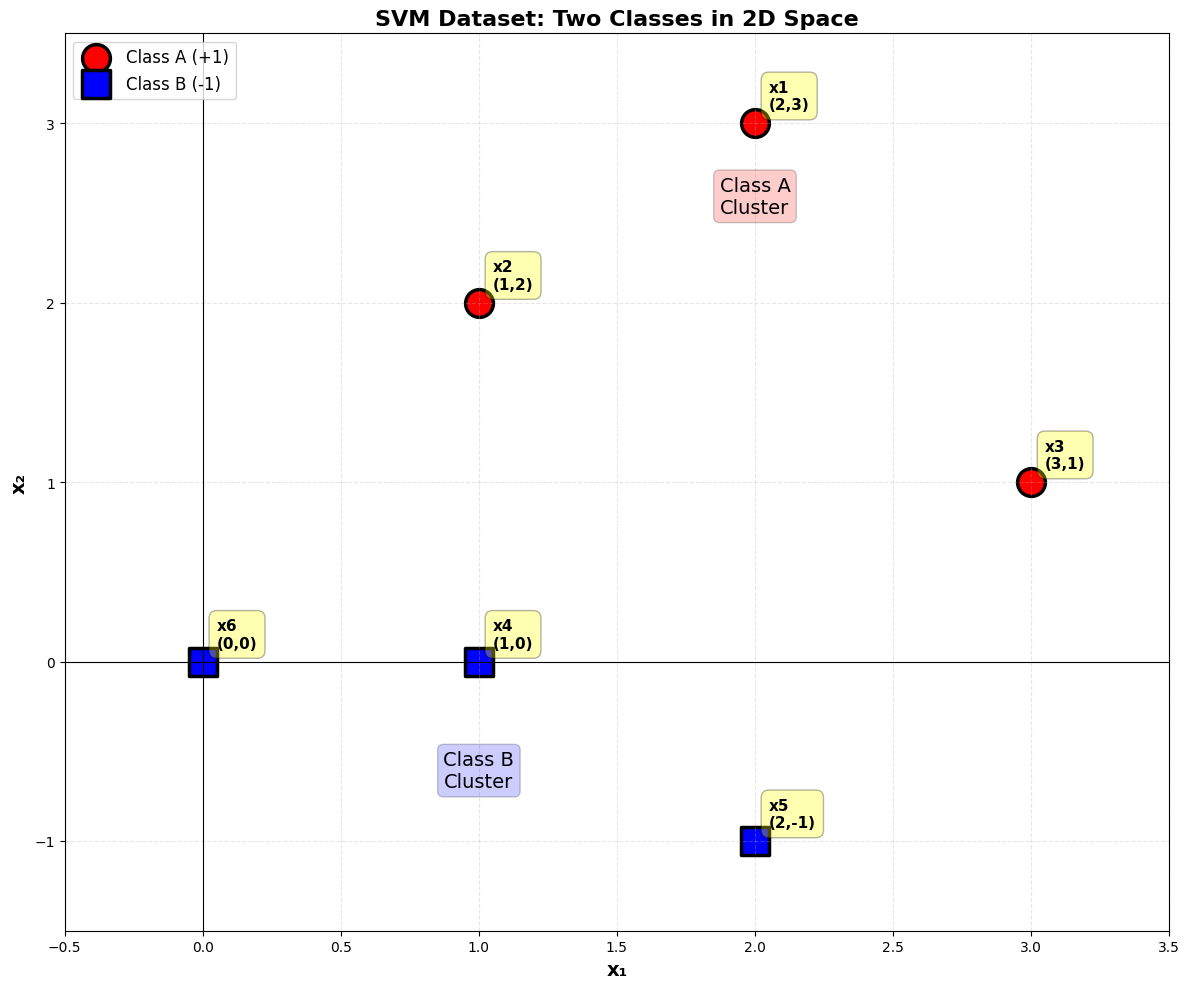


Observation:
  ✓ Class A points (red circles) are in the upper-right region
  ✓ Class B points (blue squares) are in the lower-left region
  ✓ YES, the two classes form DISTINCT CLUSTERS
TASK 1.2: WHAT IS LINEAR SEPARABILITY?

Definition:
  Two classes are LINEARLY SEPARABLE if we can draw a straight line
  (or hyperplane in higher dimensions) that completely separates them.

  Formally: There exists a line defined by w·x + b = 0 such that:
    • ALL Class A points satisfy: w·x + b > 0
    • ALL Class B points satisfy: w·x + b < 0

Implications for Classification:
  ✓ SIMPLE problem: Can use linear classifiers (like SVM, perceptron)
  ✓ GUARANTEED solution: Linear SVM will find optimal separator
  ✓ EFFICIENT: Fast training and prediction
  ✓ INTERPRETABLE: Clear decision boundary

  If NOT linearly separable:
  ✗ Need non-linear methods (kernel SVM, neural networks)
  ✗ More complex decision boundaries required
TASK 1.3: CHECKING LINEAR SEPARABILITY

Visual Analysis:
  Class A: x₁ = 

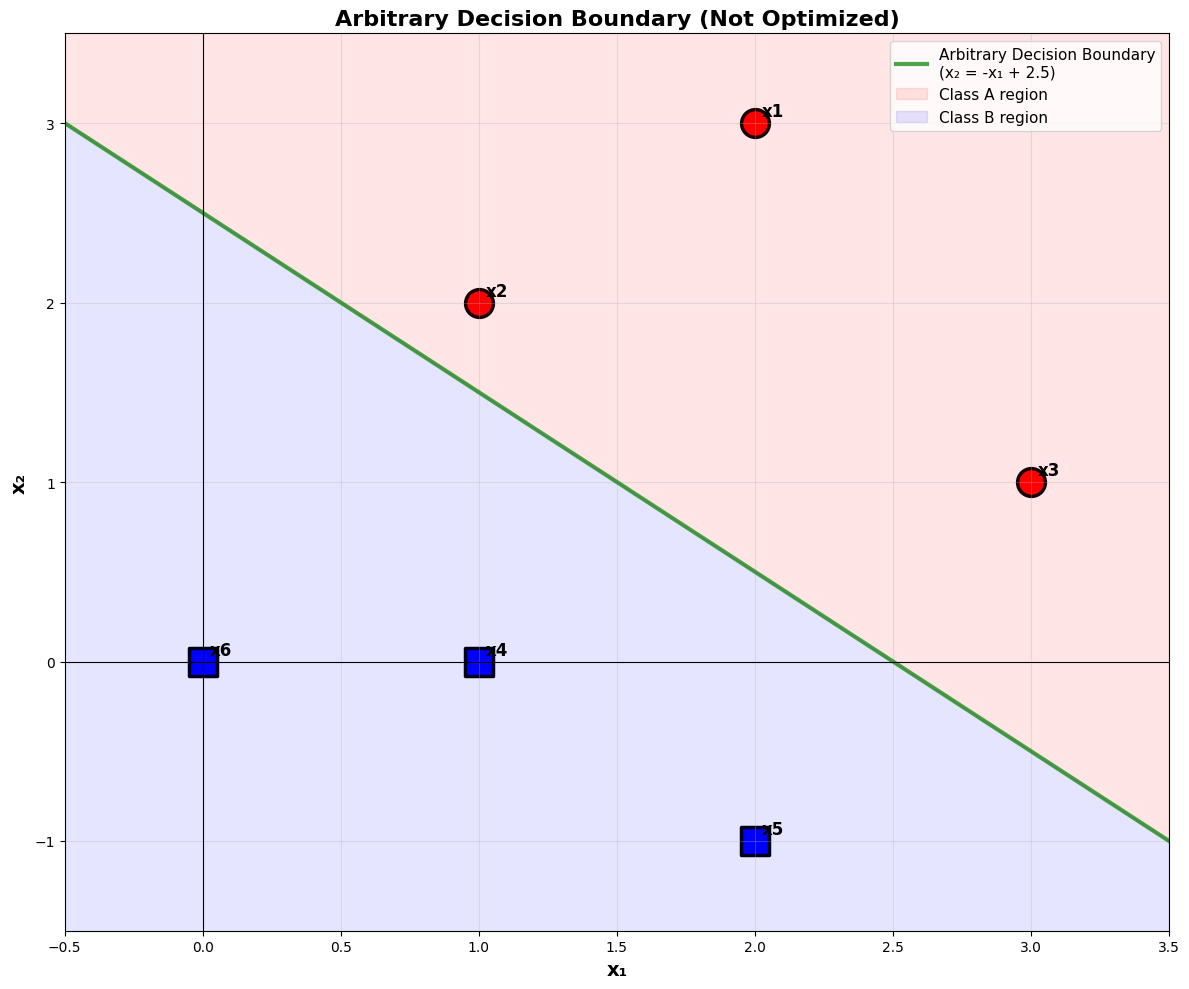


Arbitrary Boundary Sketched:
  Line equation: x₂ = -x₁ + 2.5  (or x₁ + x₂ = 2.5)
  This line separates the classes, but is it OPTIMAL? Not yet!
TASK 1.4: UNDERSTANDING THE MARGIN

Definition of MARGIN:
  The margin is the perpendicular distance between the decision boundary
  and the CLOSEST data points from EITHER class.

  Components:
    • Decision boundary: The line that separates classes
    • Support vectors: The closest points to the boundary
    • Margin: 2 × (distance from boundary to support vectors)

  Mathematical Definition:
    For a decision boundary w·x + b = 0:
    Margin = 2/||w||, where ||w|| is the norm of weight vector


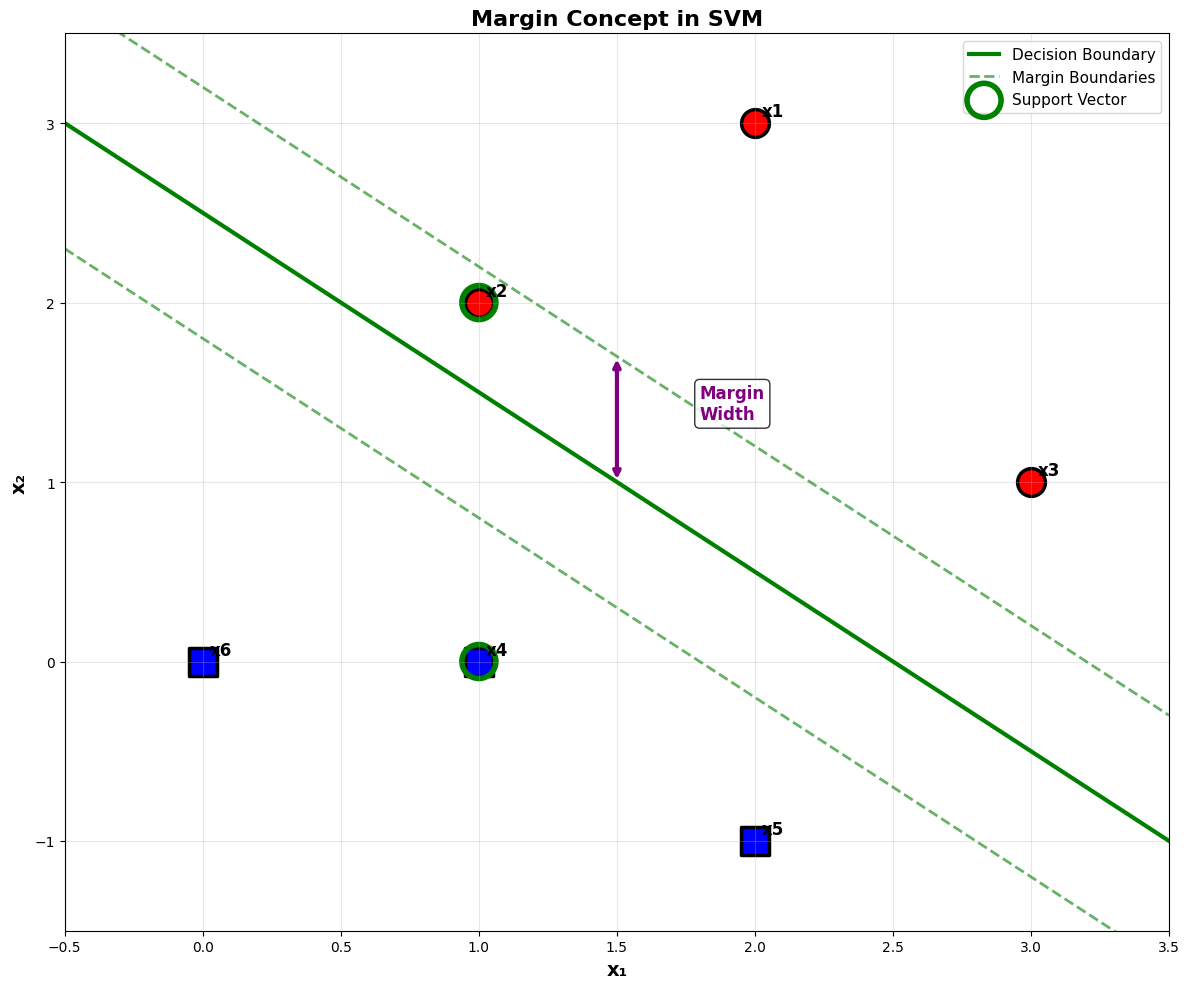

TASK 1.5: WHY MAXIMIZE THE MARGIN?

Reasons to MAXIMIZE the margin:

1. BETTER GENERALIZATION:
   ✓ Larger margin → more room for error
   ✓ New data points more likely to be classified correctly
   ✓ Reduces overfitting to training data

2. ROBUSTNESS TO NOISE:
   ✓ Small perturbations won't change classification
   ✓ Less sensitive to measurement errors
   ✓ More stable predictions

3. UNIQUE OPTIMAL SOLUTION:
   ✓ Maximum margin defines ONE best boundary
   ✓ Objective and reproducible
   ✓ Mathematical optimality guarantee

4. THEORETICAL GUARANTEES:
   ✓ VC dimension theory: larger margin → better bounds on test error
   ✓ Statistical learning theory supports this approach

What happens with SMALL margin?

  Problems:
  ✗ OVERFITTING: Boundary too close to training points
  ✗ POOR GENERALIZATION: New points easily misclassified
  ✗ HIGH VARIANCE: Small changes in data → big changes in boundary
  ✗ NOISE SENSITIVITY: Outliers have too much influence


C:\Users\Aitzh\AppData\Local\Temp\ipykernel_10000\215361694.py:260: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Aitzh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


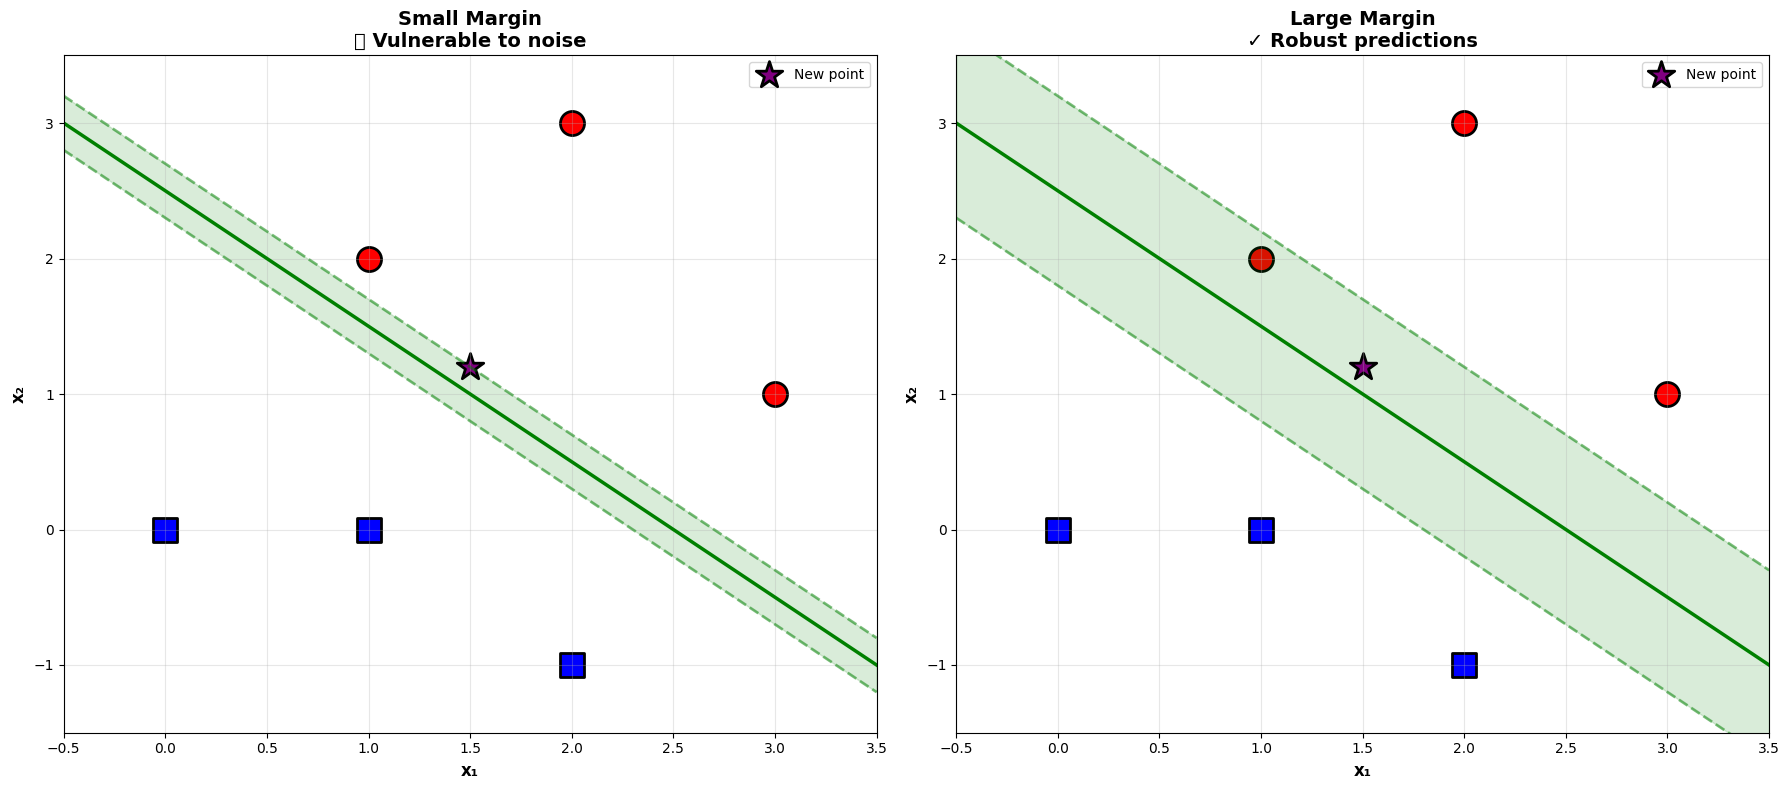


Example Scenario:
  Imagine a new point appears at (1.5, 1.2)
  • Small margin: Point is very close to boundary → uncertain prediction
  • Large margin: Point is safely away from boundary → confident prediction
TASK 1 COMPLETED!

Key Insights:
  ✓ Classes are linearly separable
  ✓ Margin = distance from boundary to closest points
  ✓ Maximize margin for better generalization and robustness
  ✓ SVM finds the optimal maximum-margin boundary


In [7]:
import numpy as np
import matplotlib.pyplot as plt

print("SVM TASK 1: SKETCH & INTUITION")

# Given data points
X = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y = np.array([1, 1, 1, -1, -1, -1])

print("\nGiven Dataset:")
print("Point      Coordinates    Label    Class")

for i, (point, label) in enumerate(zip(X, y)):
    class_name = "Class A" if label == 1 else "Class B"
    sign = "+" if label == 1 else "-"
    print(f"x{i+1}         [{point[0]}, {point[1]}]        {sign}1       {class_name}")

print("TASK 1.1: PLOTTING THE DATA POINTS")

plt.figure(figsize=(12, 10))

# Plot each point
for i, (point, label) in enumerate(zip(X, y)):
    if label == 1:
        color = 'red'
        marker = 'o'
        class_label = 'Class A (+1)'
    else:
        color = 'blue'
        marker = 's'
        class_label = 'Class B (-1)'
    
    plt.scatter(point[0], point[1], c=color, s=400, marker=marker, 
                edgecolors='black', linewidths=2.5, label=class_label if i in [0, 3] else '')
    
    # Annotate points
    plt.annotate(f'x{i+1}\n({point[0]},{point[1]})', 
                 xy=(point[0], point[1]), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 fontsize=11,
                 fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title('SVM Dataset: Two Classes in 2D Space', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(fontsize=12, loc='upper left')
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)

# Add cluster annotations
plt.text(2, 2.5, 'Class A\nCluster', fontsize=14, ha='center',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
plt.text(1, -0.7, 'Class B\nCluster', fontsize=14, ha='center',
         bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2))

plt.tight_layout()
plt.show()

print("\nObservation:")
print("  ✓ Class A points (red circles) are in the upper-right region")
print("  ✓ Class B points (blue squares) are in the lower-left region")
print("  ✓ YES, the two classes form DISTINCT CLUSTERS")
print("TASK 1.2: WHAT IS LINEAR SEPARABILITY?")
print("\nDefinition:")
print("  Two classes are LINEARLY SEPARABLE if we can draw a straight line")
print("  (or hyperplane in higher dimensions) that completely separates them.")
print("\n  Formally: There exists a line defined by w·x + b = 0 such that:")
print("    • ALL Class A points satisfy: w·x + b > 0")
print("    • ALL Class B points satisfy: w·x + b < 0")

print("\nImplications for Classification:")
print("  ✓ SIMPLE problem: Can use linear classifiers (like SVM, perceptron)")
print("  ✓ GUARANTEED solution: Linear SVM will find optimal separator")
print("  ✓ EFFICIENT: Fast training and prediction")
print("  ✓ INTERPRETABLE: Clear decision boundary")
print("\n  If NOT linearly separable:")
print("  ✗ Need non-linear methods (kernel SVM, neural networks)")
print("  ✗ More complex decision boundaries required")

print("TASK 1.3: CHECKING LINEAR SEPARABILITY")


# Visual inspection
print("\nVisual Analysis:")
print("  Class A: x₁ = [2,3], x₂ = [1,2], x₃ = [3,1]")
print("  Class B: x₄ = [1,0], x₅ = [2,-1], x₆ = [0,0]")
print("\n  Looking at coordinates:")
print("  • Class A points have larger x₁ + x₂ values")
print("  • Class B points have smaller x₁ + x₂ values")
print("\n  ✓ YES, these classes ARE LINEARLY SEPARABLE!")

# Sketch an arbitrary decision boundary
plt.figure(figsize=(12, 10))

# Plot points
for i, (point, label) in enumerate(zip(X, y)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    plt.scatter(point[0], point[1], c=color, s=400, marker=marker, 
                edgecolors='black', linewidths=2.5)
    plt.annotate(f'x{i+1}', xy=(point[0], point[1]), xytext=(5, 5), 
                 textcoords='offset points', fontsize=12, fontweight='bold')

# Sketch an arbitrary separating line: x₂ = -x₁ + 2.5
x_line = np.linspace(-0.5, 3.5, 100)
y_line = -x_line + 2.5

plt.plot(x_line, y_line, 'g-', linewidth=3, label='Arbitrary Decision Boundary\n(x₂ = -x₁ + 2.5)', alpha=0.7)

# Shade regions
plt.fill_between(x_line, y_line, 4, alpha=0.1, color='red', label='Class A region')
plt.fill_between(x_line, -2, y_line, alpha=0.1, color='blue', label='Class B region')

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title('Arbitrary Decision Boundary (Not Optimized)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(fontsize=11)
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.tight_layout()
plt.show()

print("\nArbitrary Boundary Sketched:")
print("  Line equation: x₂ = -x₁ + 2.5  (or x₁ + x₂ = 2.5)")
print("  This line separates the classes, but is it OPTIMAL? Not yet!")

print("TASK 1.4: UNDERSTANDING THE MARGIN")


print("\nDefinition of MARGIN:")
print("  The margin is the perpendicular distance between the decision boundary")
print("  and the CLOSEST data points from EITHER class.")
print("\n  Components:")
print("    • Decision boundary: The line that separates classes")
print("    • Support vectors: The closest points to the boundary")
print("    • Margin: 2 × (distance from boundary to support vectors)")

print("\n  Mathematical Definition:")
print("    For a decision boundary w·x + b = 0:")
print("    Margin = 2/||w||, where ||w|| is the norm of weight vector")

# Visualize margin concept
plt.figure(figsize=(12, 10))

# Plot points
for i, (point, label) in enumerate(zip(X, y)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    plt.scatter(point[0], point[1], c=color, s=400, marker=marker, 
                edgecolors='black', linewidths=2.5)
    plt.annotate(f'x{i+1}', xy=(point[0], point[1]), xytext=(5, 5), 
                 textcoords='offset points', fontsize=12, fontweight='bold')

# Draw decision boundary with margins
x_line = np.linspace(-0.5, 3.5, 100)
y_decision = -x_line + 2.5
y_upper = -x_line + 3.2  # Upper margin
y_lower = -x_line + 1.8  # Lower margin

plt.plot(x_line, y_decision, 'g-', linewidth=3, label='Decision Boundary')
plt.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.6, label='Margin Boundaries')
plt.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.6)

# Highlight support vectors (closest points)
support_vectors = [1, 3]  # x₂ and x₄ (approximately)
for sv in support_vectors:
    plt.scatter(X[sv][0], X[sv][1], s=600, facecolors='none', 
                edgecolors='green', linewidths=4, label='Support Vector' if sv == 1 else '')

# Draw arrows showing margin width
mid_x, mid_y = 1.5, 1.0
plt.annotate('', xy=(mid_x, -mid_x + 3.2), xytext=(mid_x, -mid_x + 2.5),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=3))
plt.text(mid_x + 0.3, mid_y + 0.35, 'Margin\nWidth', fontsize=12, color='purple', 
         fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title('Margin Concept in SVM', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper right')
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.tight_layout()
plt.show()
print("TASK 1.5: WHY MAXIMIZE THE MARGIN?")
print("\nReasons to MAXIMIZE the margin:")
print("\n1. BETTER GENERALIZATION:")
print("   ✓ Larger margin → more room for error")
print("   ✓ New data points more likely to be classified correctly")
print("   ✓ Reduces overfitting to training data")

print("\n2. ROBUSTNESS TO NOISE:")
print("   ✓ Small perturbations won't change classification")
print("   ✓ Less sensitive to measurement errors")
print("   ✓ More stable predictions")

print("\n3. UNIQUE OPTIMAL SOLUTION:")
print("   ✓ Maximum margin defines ONE best boundary")
print("   ✓ Objective and reproducible")
print("   ✓ Mathematical optimality guarantee")

print("\n4. THEORETICAL GUARANTEES:")
print("   ✓ VC dimension theory: larger margin → better bounds on test error")
print("   ✓ Statistical learning theory supports this approach")

print("\nWhat happens with SMALL margin?")
print("\n  Problems:")
print("  ✗ OVERFITTING: Boundary too close to training points")
print("  ✗ POOR GENERALIZATION: New points easily misclassified")
print("  ✗ HIGH VARIANCE: Small changes in data → big changes in boundary")
print("  ✗ NOISE SENSITIVITY: Outliers have too much influence")

# Visualize small vs large margin
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

for idx, (margin_type, offset) in enumerate([('Small Margin', 0.2), ('Large Margin', 0.7)]):
    ax = axes[idx]
    
    # Plot points
    for i, (point, label) in enumerate(zip(X, y)):
        color = 'red' if label == 1 else 'blue'
        marker = 'o' if label == 1 else 's'
        ax.scatter(point[0], point[1], c=color, s=300, marker=marker, 
                  edgecolors='black', linewidths=2)
    
    # Draw boundary and margins
    x_line = np.linspace(-0.5, 3.5, 100)
    y_decision = -x_line + 2.5
    y_upper = -x_line + 2.5 + offset
    y_lower = -x_line + 2.5 - offset
    
    ax.plot(x_line, y_decision, 'g-', linewidth=2.5)
    ax.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.5)
    ax.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.5)
    ax.fill_between(x_line, y_lower, y_upper, alpha=0.15, color='green')
    
    # Add a "new point" to show vulnerability
    new_point = np.array([1.5, 1.2])
    ax.scatter(new_point[0], new_point[1], c='purple', s=400, marker='*', 
              edgecolors='black', linewidths=2, label='New point')
    
    ax.set_xlabel('x₁', fontsize=12, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=12, fontweight='bold')
    ax.set_title(f'{margin_type}\n{"❌ Vulnerable to noise" if idx == 0 else "✓ Robust predictions"}', 
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-1.5, 3.5)

plt.tight_layout()
plt.show()

print("\nExample Scenario:")
print("  Imagine a new point appears at (1.5, 1.2)")
print("  • Small margin: Point is very close to boundary → uncertain prediction")
print("  • Large margin: Point is safely away from boundary → confident prediction")
print("TASK 1 COMPLETED!")
print("\nKey Insights:")
print("  ✓ Classes are linearly separable")
print("  ✓ Margin = distance from boundary to closest points")
print("  ✓ Maximize margin for better generalization and robustness")
print("  ✓ SVM finds the optimal maximum-margin boundary")

Task2 Decision Boundary for Hard-Margin

SVM TASK 2: DECISION BOUNDARY FOR HARD-MARGIN
TASK 2.1: WRITING MARGIN CONSTRAINTS

Decision boundary: xᵀβ + β₀ = 0, where β = [β₁, β₂]ᵀ

Margin constraint: yᵢ(βᵀxᵢ + β₀) ≥ 1 for all i

Expanded for each observation:
x1: y1(β₁·2 + β₂·3 + β₀) ≥ 1
    where y1 = +1, so:
    1(β₁·2 + β₂·3 + β₀) ≥ 1
    → β₁·2 + β₂·3 + β₀ ≥ 1

x2: y2(β₁·1 + β₂·2 + β₀) ≥ 1
    where y2 = +1, so:
    1(β₁·1 + β₂·2 + β₀) ≥ 1
    → β₁·1 + β₂·2 + β₀ ≥ 1

x3: y3(β₁·3 + β₂·1 + β₀) ≥ 1
    where y3 = +1, so:
    1(β₁·3 + β₂·1 + β₀) ≥ 1
    → β₁·3 + β₂·1 + β₀ ≥ 1

x4: y4(β₁·1 + β₂·0 + β₀) ≥ 1
    where y4 = -1, so:
    -1(β₁·1 + β₂·0 + β₀) ≥ 1
    → β₁·1 + β₂·0 + β₀ ≤ -1

x5: y5(β₁·2 + β₂·-1 + β₀) ≥ 1
    where y5 = -1, so:
    -1(β₁·2 + β₂·-1 + β₀) ≥ 1
    → β₁·2 + β₂·-1 + β₀ ≤ -1

x6: y6(β₁·0 + β₂·0 + β₀) ≥ 1
    where y6 = -1, so:
    -1(β₁·0 + β₂·0 + β₀) ≥ 1
    → β₁·0 + β₂·0 + β₀ ≤ -1

TASK 2.2: WHAT DOES THE MARGIN CONSTRAINT ENFORCE?

The margin constraint yᵢ(βᵀxᵢ + β₀) ≥ 1 ensures:

For Class A (yᵢ = +1):
 

C:\Users\Aitzh\AppData\Local\Temp\ipykernel_10000\4255772461.py:101: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Aitzh\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


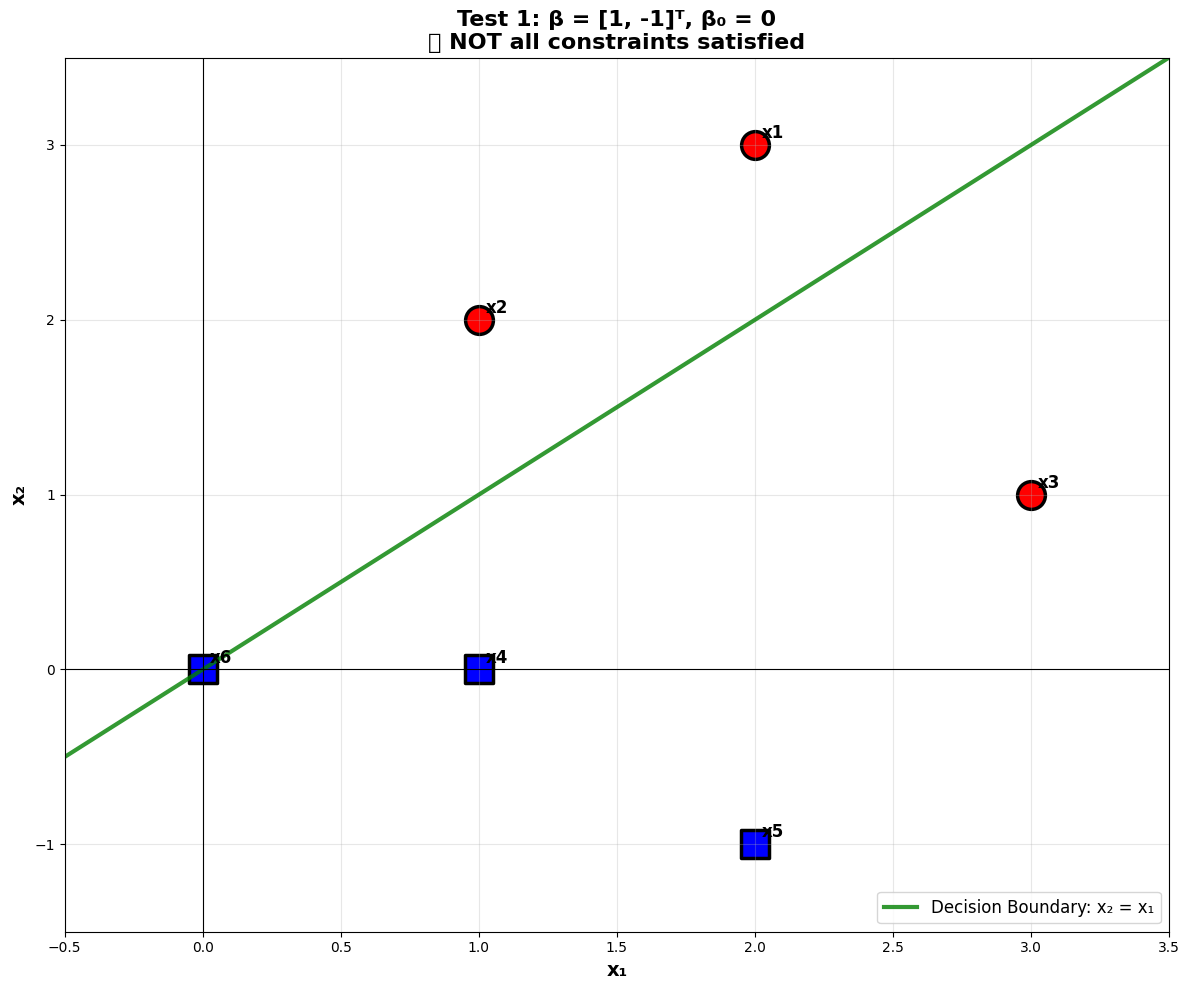


Conclusion: This boundary does NOT satisfy all margin constraints!
TASK 2.4: TESTING β = [2, 2]ᵀ, β₀ = -4

Decision boundary equation:
  β₁x₁ + β₂x₂ + β₀ = 0
  2x₁ + 2x₂ + (-4) = 0
  2x₁ + 2x₂ - 4 = 0
  → x₁ + x₂ = 2
  → x₂ = -x₁ + 2
Verifying margin constraints for each observation:
Point    xᵢ           yᵢ     βᵀxᵢ+β₀      yᵢ(βᵀxᵢ+β₀)      ≥ 1?     Status
x1       [2, 3]    +1        +6.00         +6.00        True     ✓ Pass
x2       [1, 2]    +1        +2.00         +2.00        True     ✓ Pass
x3       [3, 1]    +1        +4.00         +4.00        True     ✓ Pass
x4       [1, 0]    -1        -2.00         +2.00        True     ✓ Pass
x5       [2, -1]    -1        -2.00         +2.00        True     ✓ Pass
x6       [0, 0]    -1        -4.00         +4.00        True     ✓ Pass
All constraints satisfied: True
MARGIN CALCULATION:

Margin formula: M = 1 / ||β||

||β|| = √(β₁² + β₂²)
     = √(2² + 2²)
     = √(4 + 4)
     = √8
     = 2.8284

Margin M = 1/2.8284 = 0.3536

Total margin

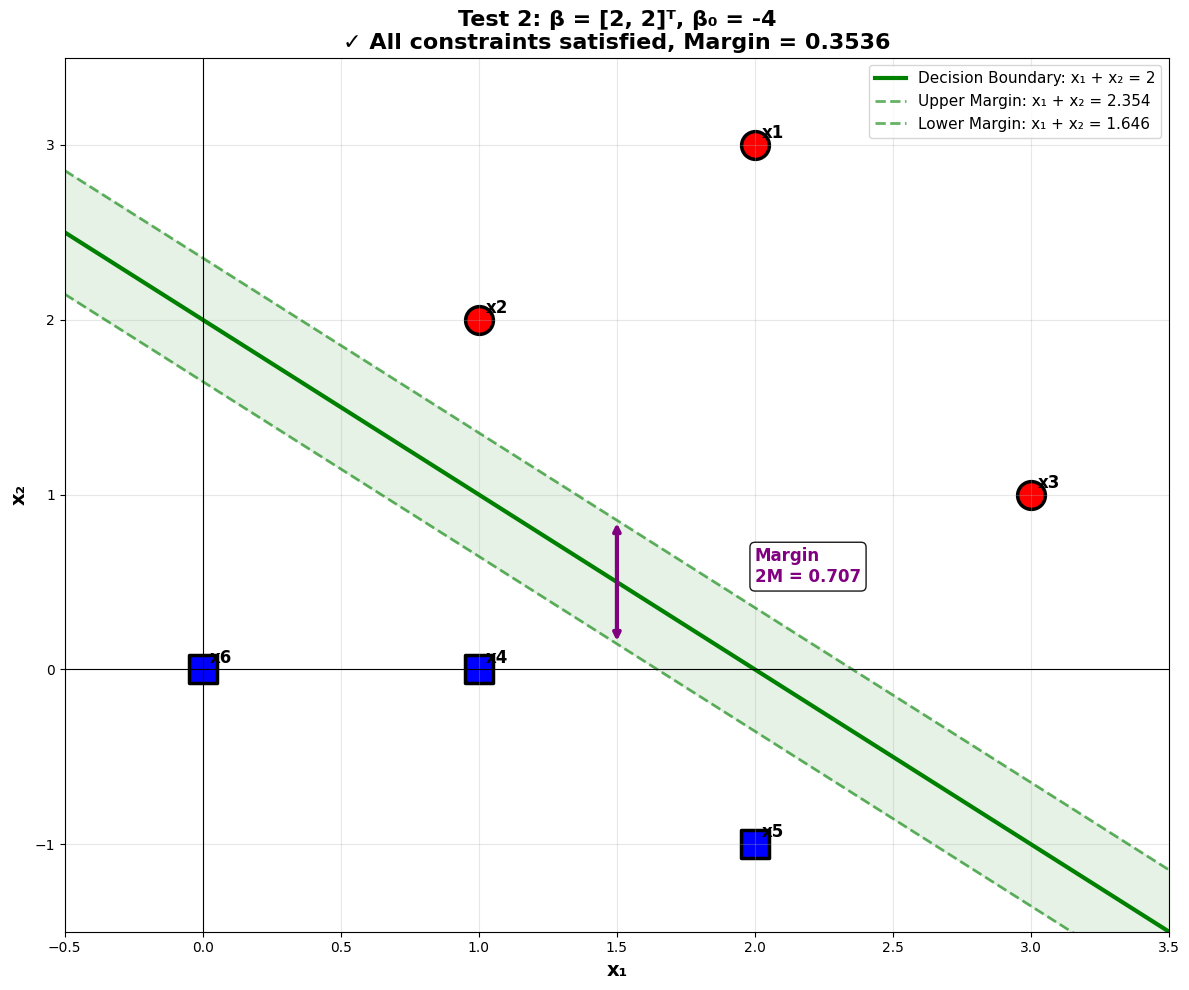


Conclusion: This boundary satisfies all constraints!
Support vectors (points on the margin): []
TASK 2.5: USING SKLEARN TO FIND OPTIMAL DECISION LINE

Training SVM with linear kernel...

Optimized SVM Parameters:
β = [0.499840, 0.999680]ᵀ
β₀ = -1.499413
||β|| = 1.117676
Margin M = 1/||β|| = 0.894713
Total margin width = 2M = 1.789427

Decision boundary equation:
  0.4998x₁ + 0.9997x₂ + -1.4994 = 0
  → x₂ = -2.0000x₁ + 1.4999

Number of support vectors: 3
Support vector indices: [3 1 2]

Support vectors coordinates:
  x4 = [1 0], y4 = -1
  x2 = [1 2], y2 = +1
  x3 = [3 1], y3 = +1
Verifying optimal solution satisfies all constraints:
Point    xᵢ           yᵢ     yᵢ(βᵀxᵢ+β₀)      Status
x1       [2, 3]    +1      +2.499307      ✓ Pass
x2       [1, 2]    +1      +0.999787      ★ Support Vector
x3       [3, 1]    +1      +0.999787      ★ Support Vector
x4       [1, 0]    -1      +0.999573      ★ Support Vector
x5       [2, -1]    -1      +1.499413      ✓ Pass
x6       [0, 0]    -1      +1

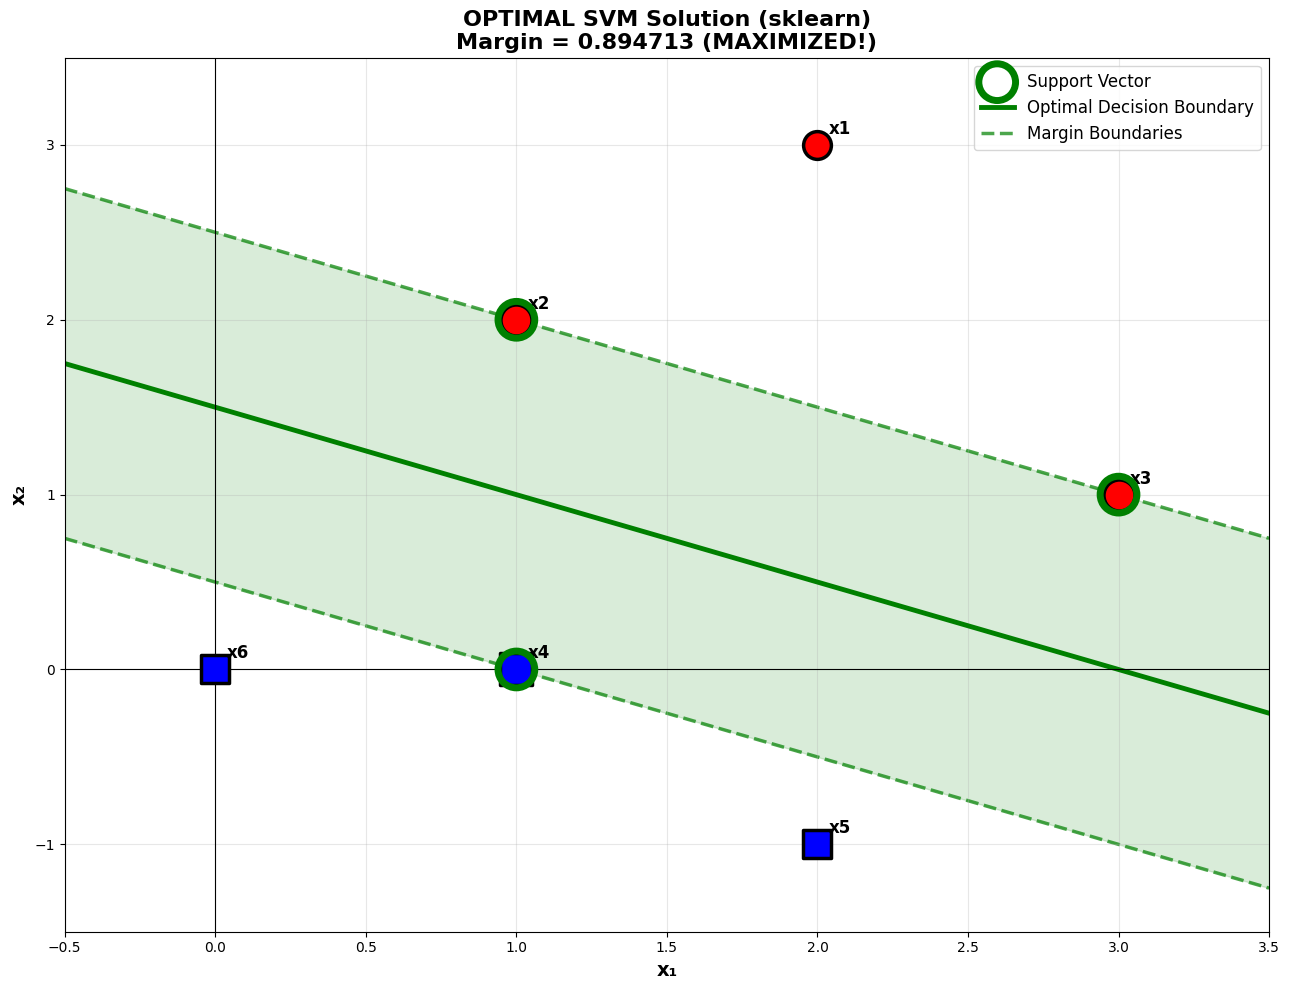

TASK 2 COMPLETED!

Key Results:
  ✓ Optimal margin: M = 0.894713
  ✓ Total margin width: 2M = 1.789427
  ✓ Number of support vectors: 3
  ✓ This is the MAXIMUM possible margin for this dataset!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


print("SVM TASK 2: DECISION BOUNDARY FOR HARD-MARGIN")


# Given data
X = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y = np.array([1, 1, 1, -1, -1, -1])

print("TASK 2.1: WRITING MARGIN CONSTRAINTS")

print("\nDecision boundary: xᵀβ + β₀ = 0, where β = [β₁, β₂]ᵀ")
print("\nMargin constraint: yᵢ(βᵀxᵢ + β₀) ≥ 1 for all i")
print("\nExpanded for each observation:")

for i, (xi, yi) in enumerate(zip(X, y)):
    print(f"x{i+1}: y{i+1}(β₁·{xi[0]} + β₂·{xi[1]} + β₀) ≥ 1")
    print(f"    where y{i+1} = {yi:+d}, so:")
    if yi == 1:
        print(f"    {yi}(β₁·{xi[0]} + β₂·{xi[1]} + β₀) ≥ 1")
        print(f"    → β₁·{xi[0]} + β₂·{xi[1]} + β₀ ≥ 1")
    else:
        print(f"    {yi}(β₁·{xi[0]} + β₂·{xi[1]} + β₀) ≥ 1")
        print(f"    → β₁·{xi[0]} + β₂·{xi[1]} + β₀ ≤ -1")
    print()

print("TASK 2.2: WHAT DOES THE MARGIN CONSTRAINT ENFORCE?")

print("\nThe margin constraint yᵢ(βᵀxᵢ + β₀) ≥ 1 ensures:")
print("\nFor Class A (yᵢ = +1):")
print("  • Constraint becomes: βᵀxᵢ + β₀ ≥ 1")
print("  • Meaning: Point must be on or ABOVE the upper margin boundary")
print("  • The value βᵀxᵢ + β₀ must be at least +1")
print("  • Distance from decision boundary ≥ 1/||β||")

print("\nFor Class B (yᵢ = -1):")
print("  • Constraint becomes: βᵀxᵢ + β₀ ≤ -1")
print("  • Meaning: Point must be on or BELOW the lower margin boundary")
print("  • The value βᵀxᵢ + β₀ must be at most -1")
print("  • Distance from decision boundary ≥ 1/||β||")

print("\nGeneral Interpretation:")
print("  ✓ Correctly classified: yᵢ(βᵀxᵢ + β₀) > 0")
print("  ✓ Beyond margin: yᵢ(βᵀxᵢ + β₀) > 1")
print("  ✓ On margin (support vector): yᵢ(βᵀxᵢ + β₀) = 1")
print("  ✗ Inside margin: 0 < yᵢ(βᵀxᵢ + β₀) < 1")
print("  ✗ Misclassified: yᵢ(βᵀxᵢ + β₀) < 0")
print("TASK 2.3: TESTING β = [1, -1]ᵀ, β₀ = 0")
beta1 = np.array([1, -1])
beta0_1 = 0

print("\nDecision boundary equation:")
print(f"  β₁x₁ + β₂x₂ + β₀ = 0")
print(f"  {beta1[0]}x₁ + ({beta1[1]})x₂ + {beta0_1} = 0")
print(f"  x₁ - x₂ = 0")
print(f"  → x₂ = x₁")

print("Verifying margin constraints for each observation:")
print(f"{'Point':<8} {'xᵢ':<12} {'yᵢ':<6} {'βᵀxᵢ+β₀':<12} {'yᵢ(βᵀxᵢ+β₀)':<16} {'≥ 1?':<8} {'Status'}")
all_satisfied = True
for i, (xi, yi) in enumerate(zip(X, y)):
    beta_xi = np.dot(beta1, xi) + beta0_1
    margin_value = yi * beta_xi
    satisfied = margin_value >= 1
    all_satisfied = all_satisfied and satisfied
    status = "✓ Pass" if satisfied else "✗ FAIL"
    
    print(f"x{i+1}       [{xi[0]}, {xi[1]}]    {yi:+2d}     {beta_xi:+8.2f}      {margin_value:+8.2f}        {str(satisfied):<8} {status}")

print(f"All constraints satisfied: {all_satisfied}")

# Plot the boundary
plt.figure(figsize=(12, 10))

for i, (point, label) in enumerate(zip(X, y)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    plt.scatter(point[0], point[1], c=color, s=400, marker=marker, 
                edgecolors='black', linewidths=2.5)
    plt.annotate(f'x{i+1}', xy=(point[0], point[1]), xytext=(5, 5), 
                 textcoords='offset points', fontsize=12, fontweight='bold')

# Draw decision boundary: x₂ = x₁
x_line = np.linspace(-0.5, 3.5, 100)
y_line = x_line
plt.plot(x_line, y_line, 'g-', linewidth=3, label='Decision Boundary: x₂ = x₁', alpha=0.8)

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title('Test 1: β = [1, -1]ᵀ, β₀ = 0\n❌ NOT all constraints satisfied', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(fontsize=12)
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.tight_layout()
plt.show()

print("\nConclusion: This boundary does NOT satisfy all margin constraints!")
print("TASK 2.4: TESTING β = [2, 2]ᵀ, β₀ = -4")
beta2 = np.array([2, 2])
beta0_2 = -4

print("\nDecision boundary equation:")
print(f"  β₁x₁ + β₂x₂ + β₀ = 0")
print(f"  {beta2[0]}x₁ + {beta2[1]}x₂ + ({beta0_2}) = 0")
print(f"  2x₁ + 2x₂ - 4 = 0")
print(f"  → x₁ + x₂ = 2")
print(f"  → x₂ = -x₁ + 2")

print("Verifying margin constraints for each observation:")
print(f"{'Point':<8} {'xᵢ':<12} {'yᵢ':<6} {'βᵀxᵢ+β₀':<12} {'yᵢ(βᵀxᵢ+β₀)':<16} {'≥ 1?':<8} {'Status'}")
all_satisfied = True
support_vectors = []

for i, (xi, yi) in enumerate(zip(X, y)):
    beta_xi = np.dot(beta2, xi) + beta0_2
    margin_value = yi * beta_xi
    satisfied = margin_value >= 1
    all_satisfied = all_satisfied and satisfied
    
    # Check if support vector (on the margin)
    if abs(margin_value - 1.0) < 0.01:
        support_vectors.append(i)
        status = "✓ Support Vector"
    elif satisfied:
        status = "✓ Pass"
    else:
        status = "✗ FAIL"
    
    print(f"x{i+1}       [{xi[0]}, {xi[1]}]    {yi:+2d}     {beta_xi:+8.2f}      {margin_value:+8.2f}        {str(satisfied):<8} {status}")

print(f"All constraints satisfied: {all_satisfied}")

# Calculate margin
beta_norm = np.linalg.norm(beta2)
margin_width = 1 / beta_norm
print("MARGIN CALCULATION:")
print(f"\nMargin formula: M = 1 / ||β||")
print(f"\n||β|| = √(β₁² + β₂²)")
print(f"     = √({beta2[0]}² + {beta2[1]}²)")
print(f"     = √({beta2[0]**2} + {beta2[1]**2})")
print(f"     = √{beta2[0]**2 + beta2[1]**2}")
print(f"     = {beta_norm:.4f}")
print(f"\nMargin M = 1/{beta_norm:.4f} = {margin_width:.4f}")
print(f"\nTotal margin width = 2M = {2*margin_width:.4f}")

# Plot the boundary with margins
plt.figure(figsize=(12, 10))

for i, (point, label) in enumerate(zip(X, y)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    size = 500 if i in support_vectors else 400
    
    plt.scatter(point[0], point[1], c=color, s=size, marker=marker, 
                edgecolors='black', linewidths=2.5)
    
    # Highlight support vectors
    if i in support_vectors:
        plt.scatter(point[0], point[1], s=700, facecolors='none', 
                   edgecolors='green', linewidths=4)
    
    plt.annotate(f'x{i+1}', xy=(point[0], point[1]), xytext=(5, 5), 
                 textcoords='offset points', fontsize=12, fontweight='bold')

# Draw decision boundary and margins
x_line = np.linspace(-0.5, 3.5, 100)
y_decision = -x_line + 2
y_upper = -x_line + 2 + margin_width
y_lower = -x_line + 2 - margin_width

plt.plot(x_line, y_decision, 'g-', linewidth=3, label='Decision Boundary: x₁ + x₂ = 2')
plt.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.6, label='Upper Margin: x₁ + x₂ = 2.354')
plt.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.6, label='Lower Margin: x₁ + x₂ = 1.646')
plt.fill_between(x_line, y_lower, y_upper, alpha=0.1, color='green')

# Add margin annotation
mid_x = 1.5
plt.annotate('', xy=(mid_x, -mid_x + 2 + margin_width), 
            xytext=(mid_x, -mid_x + 2 - margin_width),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=3))
plt.text(mid_x + 0.5, 0.5, f'Margin\n2M = {2*margin_width:.3f}', 
         fontsize=12, color='purple', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title(f'Test 2: β = [2, 2]ᵀ, β₀ = -4\n✓ All constraints satisfied, Margin = {margin_width:.4f}', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(fontsize=11, loc='upper right')
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.tight_layout()
plt.show()

print("\nConclusion: This boundary satisfies all constraints!")
print(f"Support vectors (points on the margin): {[f'x{i+1}' for i in support_vectors]}")
print("TASK 2.5: USING SKLEARN TO FIND OPTIMAL DECISION LINE")
print("\nTraining SVM with linear kernel...")
# Train SVM with large C for hard margin
svm = SVC(kernel='linear', C=1000)  # Large C enforces hard margin
svm.fit(X, y)
# Extract parameters
beta_opt = svm.coef_[0]
beta0_opt = svm.intercept_[0]
beta_norm_opt = np.linalg.norm(beta_opt)
margin_opt = 1 / beta_norm_opt
print("\nOptimized SVM Parameters:")
print(f"β = [{beta_opt[0]:.6f}, {beta_opt[1]:.6f}]ᵀ")
print(f"β₀ = {beta0_opt:.6f}")
print(f"||β|| = {beta_norm_opt:.6f}")
print(f"Margin M = 1/||β|| = {margin_opt:.6f}")
print(f"Total margin width = 2M = {2*margin_opt:.6f}")

print("\nDecision boundary equation:")
print(f"  {beta_opt[0]:.4f}x₁ + {beta_opt[1]:.4f}x₂ + {beta0_opt:.4f} = 0")

# Simplify equation
if abs(beta_opt[0]) > 0.001:
    slope = -beta_opt[1] / beta_opt[0]
    intercept = -beta0_opt / beta_opt[1]
    print(f"  → x₂ = {slope:.4f}x₁ + {intercept:.4f}")

# Support vectors
print(f"\nNumber of support vectors: {len(svm.support_)}")
print(f"Support vector indices: {svm.support_}")
print("\nSupport vectors coordinates:")
for idx in svm.support_:
    print(f"  x{idx+1} = {X[idx]}, y{idx+1} = {y[idx]:+d}")

# Verify all constraints
print("Verifying optimal solution satisfies all constraints:")
print(f"{'Point':<8} {'xᵢ':<12} {'yᵢ':<6} {'yᵢ(βᵀxᵢ+β₀)':<16} {'Status'}")

for i, (xi, yi) in enumerate(zip(X, y)):
    margin_value = yi * (np.dot(beta_opt, xi) + beta0_opt)
    
    if i in svm.support_:
        status = "★ Support Vector"
    elif margin_value >= 1:
        status = "✓ Pass"
    else:
        status = "✗ FAIL"
    
    print(f"x{i+1}       [{xi[0]}, {xi[1]}]    {yi:+2d}     {margin_value:+10.6f}      {status}")


# Plot optimal solution
plt.figure(figsize=(13, 10))

for i, (point, label) in enumerate(zip(X, y)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    size = 500 if i in svm.support_ else 400
    
    plt.scatter(point[0], point[1], c=color, s=size, marker=marker, 
                edgecolors='black', linewidths=2.5, zorder=3)
    
    # Highlight support vectors with green circle
    if i in svm.support_:
        plt.scatter(point[0], point[1], s=700, facecolors='none', 
                   edgecolors='green', linewidths=5, zorder=4, 
                   label='Support Vector' if i == svm.support_[0] else '')
    
    plt.annotate(f'x{i+1}', xy=(point[0], point[1]), xytext=(8, 8), 
                 textcoords='offset points', fontsize=12, fontweight='bold')

# Draw optimal boundary and margins
x_line = np.linspace(-0.5, 3.5, 100)
y_decision = (-beta_opt[0] * x_line - beta0_opt) / beta_opt[1]
y_upper = (-beta_opt[0] * x_line - beta0_opt + 1) / beta_opt[1]
y_lower = (-beta_opt[0] * x_line - beta0_opt - 1) / beta_opt[1]

plt.plot(x_line, y_decision, 'g-', linewidth=3.5, label='Optimal Decision Boundary', zorder=2)
plt.plot(x_line, y_upper, 'g--', linewidth=2.5, alpha=0.7, label='Margin Boundaries', zorder=1)
plt.plot(x_line, y_lower, 'g--', linewidth=2.5, alpha=0.7, zorder=1)
plt.fill_between(x_line, y_lower, y_upper, alpha=0.15, color='green', zorder=0)

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title(f'OPTIMAL SVM Solution (sklearn)\nMargin = {margin_opt:.6f} (MAXIMIZED!)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(fontsize=12, loc='upper right')
plt.xlim(-0.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.tight_layout()
plt.show()

print("TASK 2 COMPLETED!")
print("\nKey Results:")
print(f"  ✓ Optimal margin: M = {margin_opt:.6f}")
print(f"  ✓ Total margin width: 2M = {2*margin_opt:.6f}")
print(f"  ✓ Number of support vectors: {len(svm.support_)}")
print(f"  ✓ This is the MAXIMUM possible margin for this dataset!")

#3 Slack Variables for a Soft-Margin

SVM TASK 3: SLACK VARIABLES FOR SOFT-MARGIN

New Dataset:
Point      Coordinates    Label    Class       Notes
x1         [2, 3]        +1       Class A      Original
x2         [1, 2]        +1       Class A      Original
x3         [3, 1]        +1       Class A      Original
x4         [1, 0]        -1       Class B      Original
x5         [2, -1]        -1       Class B      Original
x6         [0, 0]        -1       Class B      Original
x7         [1, 3]        +1       Class A      NEW - Potential violator
x8         [3, -2]       -1       Class B      NEW - Potential violator
----------------------------------------------------------------------

Using hard-margin parameters from original data:
  β = [0.499840, 0.999680]ᵀ
  β₀ = -1.499413
TASK 3.1: COMPUTING SLACK VARIABLES ξᵢ

Soft-margin constraint: yᵢ(βᵀxᵢ + β₀) ≥ 1 - ξᵢ, where ξᵢ ≥ 0

Slack variable formula (Hinge Loss):
  ξᵢ = max(0, 1 - yᵢ(βᵀxᵢ + β₀))
Point    xᵢ           yᵢ     βᵀxᵢ+β₀      yᵢ(βᵀxᵢ+β₀)      ξᵢ         

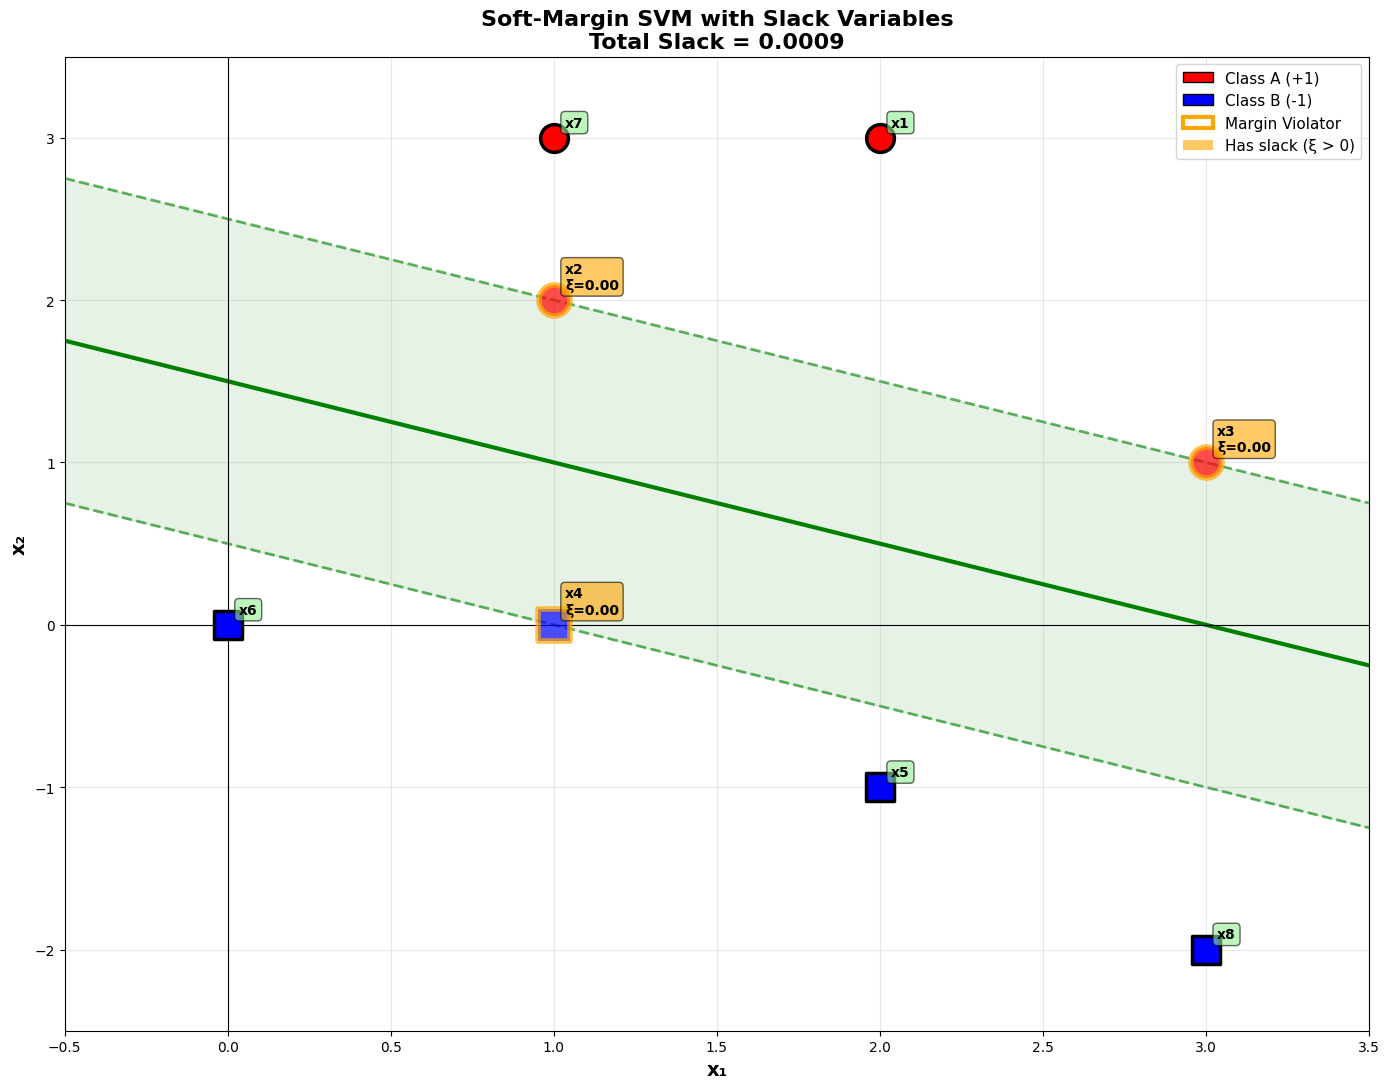

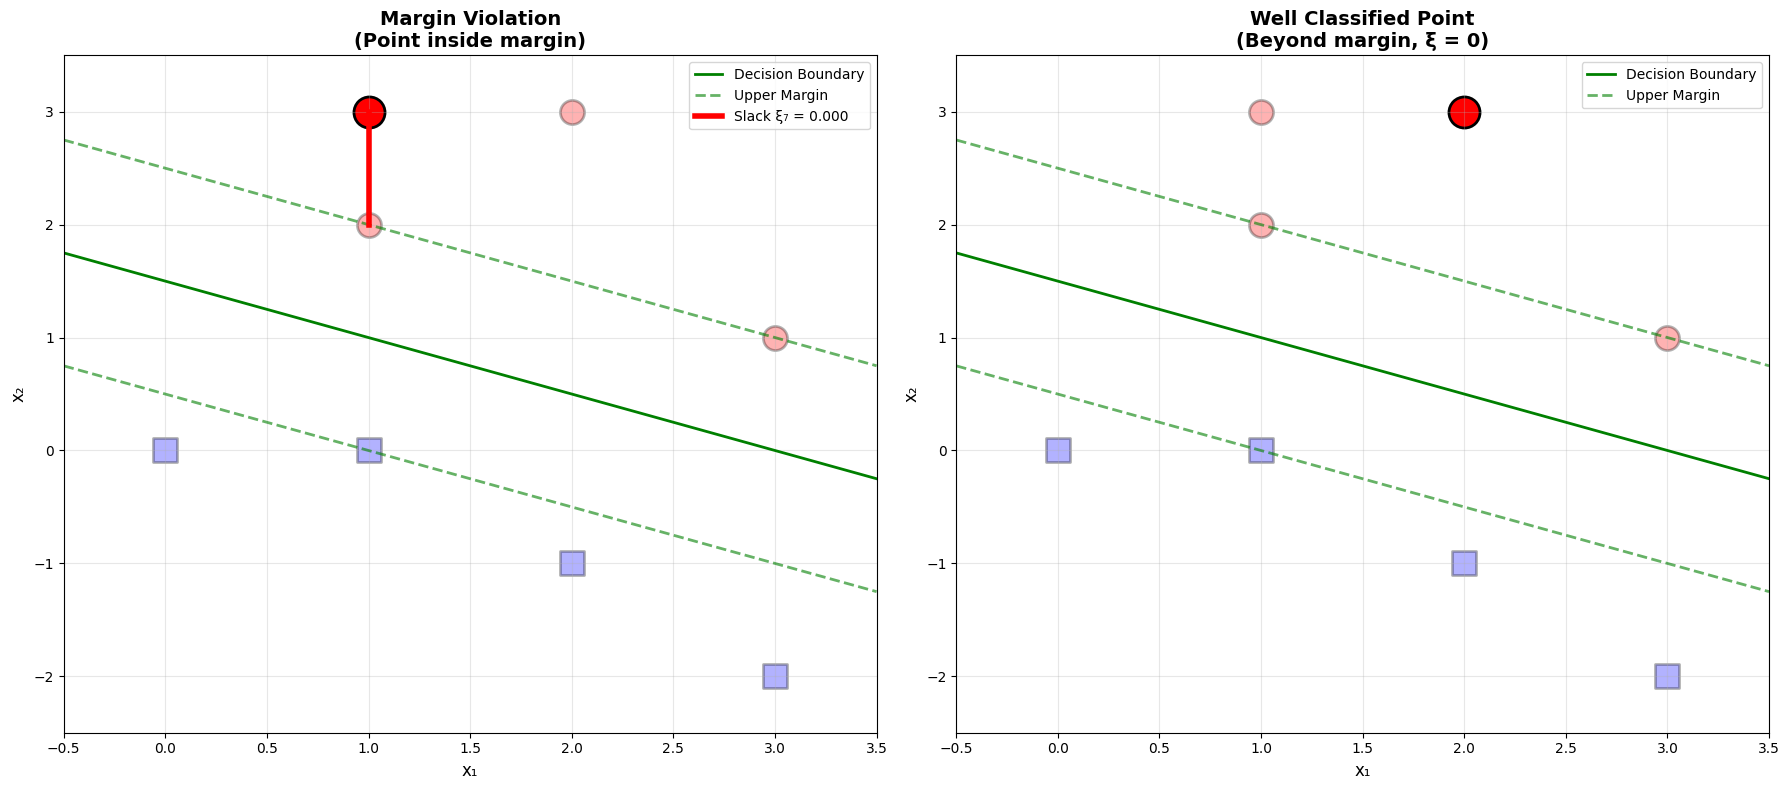

TASK 3 COMPLETED!

Key Insights:
  ✓ Slack variables allow margin violations
  ✓ ξᵢ = 0 for well-classified points
  ✓ 0 < ξᵢ < 1 for points inside margin but correctly classified
  ✓ ξᵢ ≥ 1 for misclassified points
  ✓ Total slack = 0.0009 (sum of all violations)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
print("SVM TASK 3: SLACK VARIABLES FOR SOFT-MARGIN")
# Original data
X_original = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
y_original = np.array([1, 1, 1, -1, -1, -1])

# Add two new observations
x7 = np.array([1, 3])
y7 = 1
x8 = np.array([3, -2])
y8 = -1

X_new = np.vstack([X_original, x7, x8])
y_new = np.hstack([y_original, y7, y8])

print("\nNew Dataset:")
print("Point      Coordinates    Label    Class       Notes")
for i in range(6):
    print(f"x{i+1}         [{X_new[i][0]}, {X_new[i][1]}]        {y_new[i]:+2d}       {'Class A' if y_new[i]==1 else 'Class B'}      Original")
print(f"x7         [{x7[0]}, {x7[1]}]        {y7:+2d}       Class A      NEW - Potential violator")
print(f"x8         [{x8[0]}, {x8[1]}]       {y8:+2d}       Class B      NEW - Potential violator")
print("-" * 70)

# Use the hard-margin solution from Task 2 as reference
# Train hard margin SVM on original data
svm_hard = SVC(kernel='linear', C=1000)
svm_hard.fit(X_original, y_original)
beta_hard = svm_hard.coef_[0]
beta0_hard = svm_hard.intercept_[0]

print(f"\nUsing hard-margin parameters from original data:")
print(f"  β = [{beta_hard[0]:.6f}, {beta_hard[1]:.6f}]ᵀ")
print(f"  β₀ = {beta0_hard:.6f}")


print("TASK 3.1: COMPUTING SLACK VARIABLES ξᵢ")

print("\nSoft-margin constraint: yᵢ(βᵀxᵢ + β₀) ≥ 1 - ξᵢ, where ξᵢ ≥ 0")
print("\nSlack variable formula (Hinge Loss):")
print("  ξᵢ = max(0, 1 - yᵢ(βᵀxᵢ + β₀))")

print(f"{'Point':<8} {'xᵢ':<12} {'yᵢ':<6} {'βᵀxᵢ+β₀':<12} {'yᵢ(βᵀxᵢ+β₀)':<16} {'ξᵢ':<10} {'Interpretation'}")


slack_variables = []
total_slack = 0
violating_points = []

for i, (xi, yi) in enumerate(zip(X_new, y_new)):
    # Calculate decision function value
    decision_value = np.dot(beta_hard, xi) + beta0_hard
    
    # Calculate margin value
    margin_value = yi * decision_value
    
    # Calculate slack variable using Hinge Loss
    slack = max(0, 1 - margin_value)
    slack_variables.append(slack)
    total_slack += slack
    
    # Determine status
    if slack == 0:
        interpretation = "✓ Well classified (beyond margin)"
    elif 0 < slack < 1:
        interpretation = "⚠ Margin violation (inside margin)"
        violating_points.append(i)
    else:  # slack >= 1
        interpretation = "✗ MISCLASSIFIED"
        violating_points.append(i)
    
    print(f"x{i+1}       [{xi[0]}, {xi[1]}]    {yi:+2d}     {decision_value:+8.4f}      {margin_value:+10.4f}      {slack:8.4f}   {interpretation}")

print("TASK 3.2: SLACK VARIABLE FOR WELL CLASSIFIED POINTS")

print("\nWhen a point is WELL CLASSIFIED (beyond the margin):")
print("  • yᵢ(βᵀxᵢ + β₀) ≥ 1")
print("  • Therefore: 1 - yᵢ(βᵀxᵢ + β₀) ≤ 0")
print("  • Since ξᵢ = max(0, 1 - yᵢ(βᵀxᵢ + β₀))")
print("  • We get: ξᵢ = 0")
print("\n  ✓ Slack variable is ZERO for well-classified points!")
print("  ✓ These points don't contribute to the penalty term")

print("TASK 3.3: POINTS THAT VIOLATE THE MARGIN")

print(f"\nTotal points violating the margin: {len(violating_points)}")
print("\nViolating points:")
for idx in violating_points:
    xi = X_new[idx]
    yi = y_new[idx]
    slack = slack_variables[idx]
    
    if slack < 1:
        violation_type = "Inside margin but correctly classified"
    else:
        violation_type = "MISCLASSIFIED (wrong side of boundary)"
    
    print(f"  x{idx+1} = {xi}, y{idx+1} = {yi:+d}, ξ{idx+1} = {slack:.4f}")
    print(f"     → {violation_type}")

print("TASK 3.3: TOTAL VIOLATION (TOTAL SLACK)")

print(f"\nTotal Slack = Σξᵢ = ", end="")
for i, slack in enumerate(slack_variables):
    if i > 0:
        print(" + ", end="")
    print(f"{slack:.4f}", end="")

print(f"\n            = {total_slack:.4f}")

print("\nInterpretation:")
print(f"  • Total violation across all points: {total_slack:.4f}")
print(f"  • Number of violating points: {len(violating_points)} out of {len(X_new)}")
print(f"  • Average slack per violating point: {total_slack/len(violating_points) if len(violating_points) > 0 else 0:.4f}")

# Visualize with slack variables
plt.figure(figsize=(14, 11))

# Plot all points
for i, (point, label) in enumerate(zip(X_new, y_new)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    
    # Different styling for violating points
    if i in violating_points:
        size = 500
        alpha = 0.7
        edgecolor = 'orange'
        linewidth = 4
    else:
        size = 400
        alpha = 1.0
        edgecolor = 'black'
        linewidth = 2.5
    
    plt.scatter(point[0], point[1], c=color, s=size, marker=marker, 
                alpha=alpha, edgecolors=edgecolor, linewidths=linewidth, zorder=3)
    
    # Annotate with slack value
    if slack_variables[i] > 0:
        label_text = f'x{i+1}\nξ={slack_variables[i]:.2f}'
        bbox_color = 'orange'
    else:
        label_text = f'x{i+1}'
        bbox_color = 'lightgreen'
    
    plt.annotate(label_text, xy=(point[0], point[1]), xytext=(8, 8), 
                 textcoords='offset points', fontsize=10, fontweight='bold',
                 bbox=dict(boxstyle='round', facecolor=bbox_color, alpha=0.6))

# Draw hard-margin boundary
x_line = np.linspace(-0.5, 3.5, 100)
y_decision = (-beta_hard[0] * x_line - beta0_hard) / beta_hard[1]
y_upper = (-beta_hard[0] * x_line - beta0_hard + 1) / beta_hard[1]
y_lower = (-beta_hard[0] * x_line - beta0_hard - 1) / beta_hard[1]

plt.plot(x_line, y_decision, 'g-', linewidth=3, label='Decision Boundary', zorder=2)
plt.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.6, label='Margin Boundaries', zorder=1)
plt.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.6, zorder=1)
plt.fill_between(x_line, y_lower, y_upper, alpha=0.1, color='green', zorder=0)

# Add legend elements
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Class A (+1)'),
    Patch(facecolor='blue', edgecolor='black', label='Class B (-1)'),
    Patch(facecolor='white', edgecolor='orange', linewidth=3, label='Margin Violator'),
    Patch(facecolor='orange', alpha=0.6, label='Has slack (ξ > 0)'),
]

plt.xlabel('x₁', fontsize=14, fontweight='bold')
plt.ylabel('x₂', fontsize=14, fontweight='bold')
plt.title(f'Soft-Margin SVM with Slack Variables\nTotal Slack = {total_slack:.4f}', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend(handles=legend_elements, fontsize=11, loc='upper right')
plt.xlim(-0.5, 3.5)
plt.ylim(-2.5, 3.5)
plt.tight_layout()
plt.show()

# Create a visual explanation of slack
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Left plot: Point inside margin
ax = axes[0]
example_point_margin = X_new[6]  # x7
example_y = y_new[6]
example_slack = slack_variables[6]

for i, (point, label) in enumerate(zip(X_new, y_new)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    alpha = 0.3 if i != 6 else 1.0
    size = 300 if i != 6 else 500
    ax.scatter(point[0], point[1], c=color, s=size, marker=marker, 
              alpha=alpha, edgecolors='black', linewidths=2)

ax.plot(x_line, y_decision, 'g-', linewidth=2, label='Decision Boundary')
ax.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.6, label='Upper Margin')
ax.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.6)

# Show slack visually
decision_val = np.dot(beta_hard, example_point_margin) + beta0_hard
margin_line_y = (-beta_hard[0] * example_point_margin[0] - beta0_hard + 1) / beta_hard[1]
ax.plot([example_point_margin[0], example_point_margin[0]], 
        [example_point_margin[1], margin_line_y], 
        'r-', linewidth=4, label=f'Slack ξ₇ = {example_slack:.3f}')

ax.set_title('Margin Violation\n(Point inside margin)', fontsize=14, fontweight='bold')
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-2.5, 3.5)

# Right plot: Well classified point
ax = axes[1]
example_point_good = X_new[0]  # x1
example_y_good = y_new[0]
example_slack_good = slack_variables[0]

for i, (point, label) in enumerate(zip(X_new, y_new)):
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 's'
    alpha = 0.3 if i != 0 else 1.0
    size = 300 if i != 0 else 500
    ax.scatter(point[0], point[1], c=color, s=size, marker=marker, 
              alpha=alpha, edgecolors='black', linewidths=2)

ax.plot(x_line, y_decision, 'g-', linewidth=2, label='Decision Boundary')
ax.plot(x_line, y_upper, 'g--', linewidth=2, alpha=0.6, label='Upper Margin')
ax.plot(x_line, y_lower, 'g--', linewidth=2, alpha=0.6)

ax.set_title('Well Classified Point\n(Beyond margin, ξ = 0)', fontsize=14, fontweight='bold')
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-2.5, 3.5)

plt.tight_layout()
plt.show()
print("TASK 3 COMPLETED!")
print("\nKey Insights:")
print(f"  ✓ Slack variables allow margin violations")
print(f"  ✓ ξᵢ = 0 for well-classified points")
print(f"  ✓ 0 < ξᵢ < 1 for points inside margin but correctly classified")
print(f"  ✓ ξᵢ ≥ 1 for misclassified points")
print(f"  ✓ Total slack = {total_slack:.4f} (sum of all violations)")

task4 Adding Slack Variables to the Objective Function

SVM TASK 4: EFFECT OF REGULARIZATION PARAMETER C

Objective Function (Soft-Margin SVM):

minimize: (1/2)||β||² + C·Σξᵢ

subject to:
  • yᵢ(β·xᵢ + b) ≥ 1 - ξᵢ  for all i
  • ξᵢ ≥ 0  for all i

Components:
----------------------------------------------------------------------
1. (1/2)||β||²:
   • Encourages LARGE MARGIN
   • Minimizing ||β||² maximizes margin M = 1/||β||
   • Promotes generalization

2. C·Σξᵢ:
   • Penalizes SLACK VARIABLES (violations)
   • C controls the penalty strength
   • Higher C = stronger penalty for violations

3. yᵢ(β·xᵢ + b) ≥ 1 - ξᵢ:
   • Soft constraint allowing violations
   • ξᵢ measures how much point i violates the margin
   • When ξᵢ = 0: hard constraint satisfied

4. ξᵢ ≥ 0:
   • Slack variables must be non-negative
TASK 4: HOW DOES C AFFECT THE TRADE-OFF?
HIGH C (e.g., C = 1000):
  Objective: minimize (1/2)||β||² + 1000·Σξᵢ

  Effect:
  ✓ HEAVY penalty for slack variables
  ✓ Forces ξᵢ → 0 (tries to eliminate violations)
  ✓ Prioritizes CORRECT CLASS

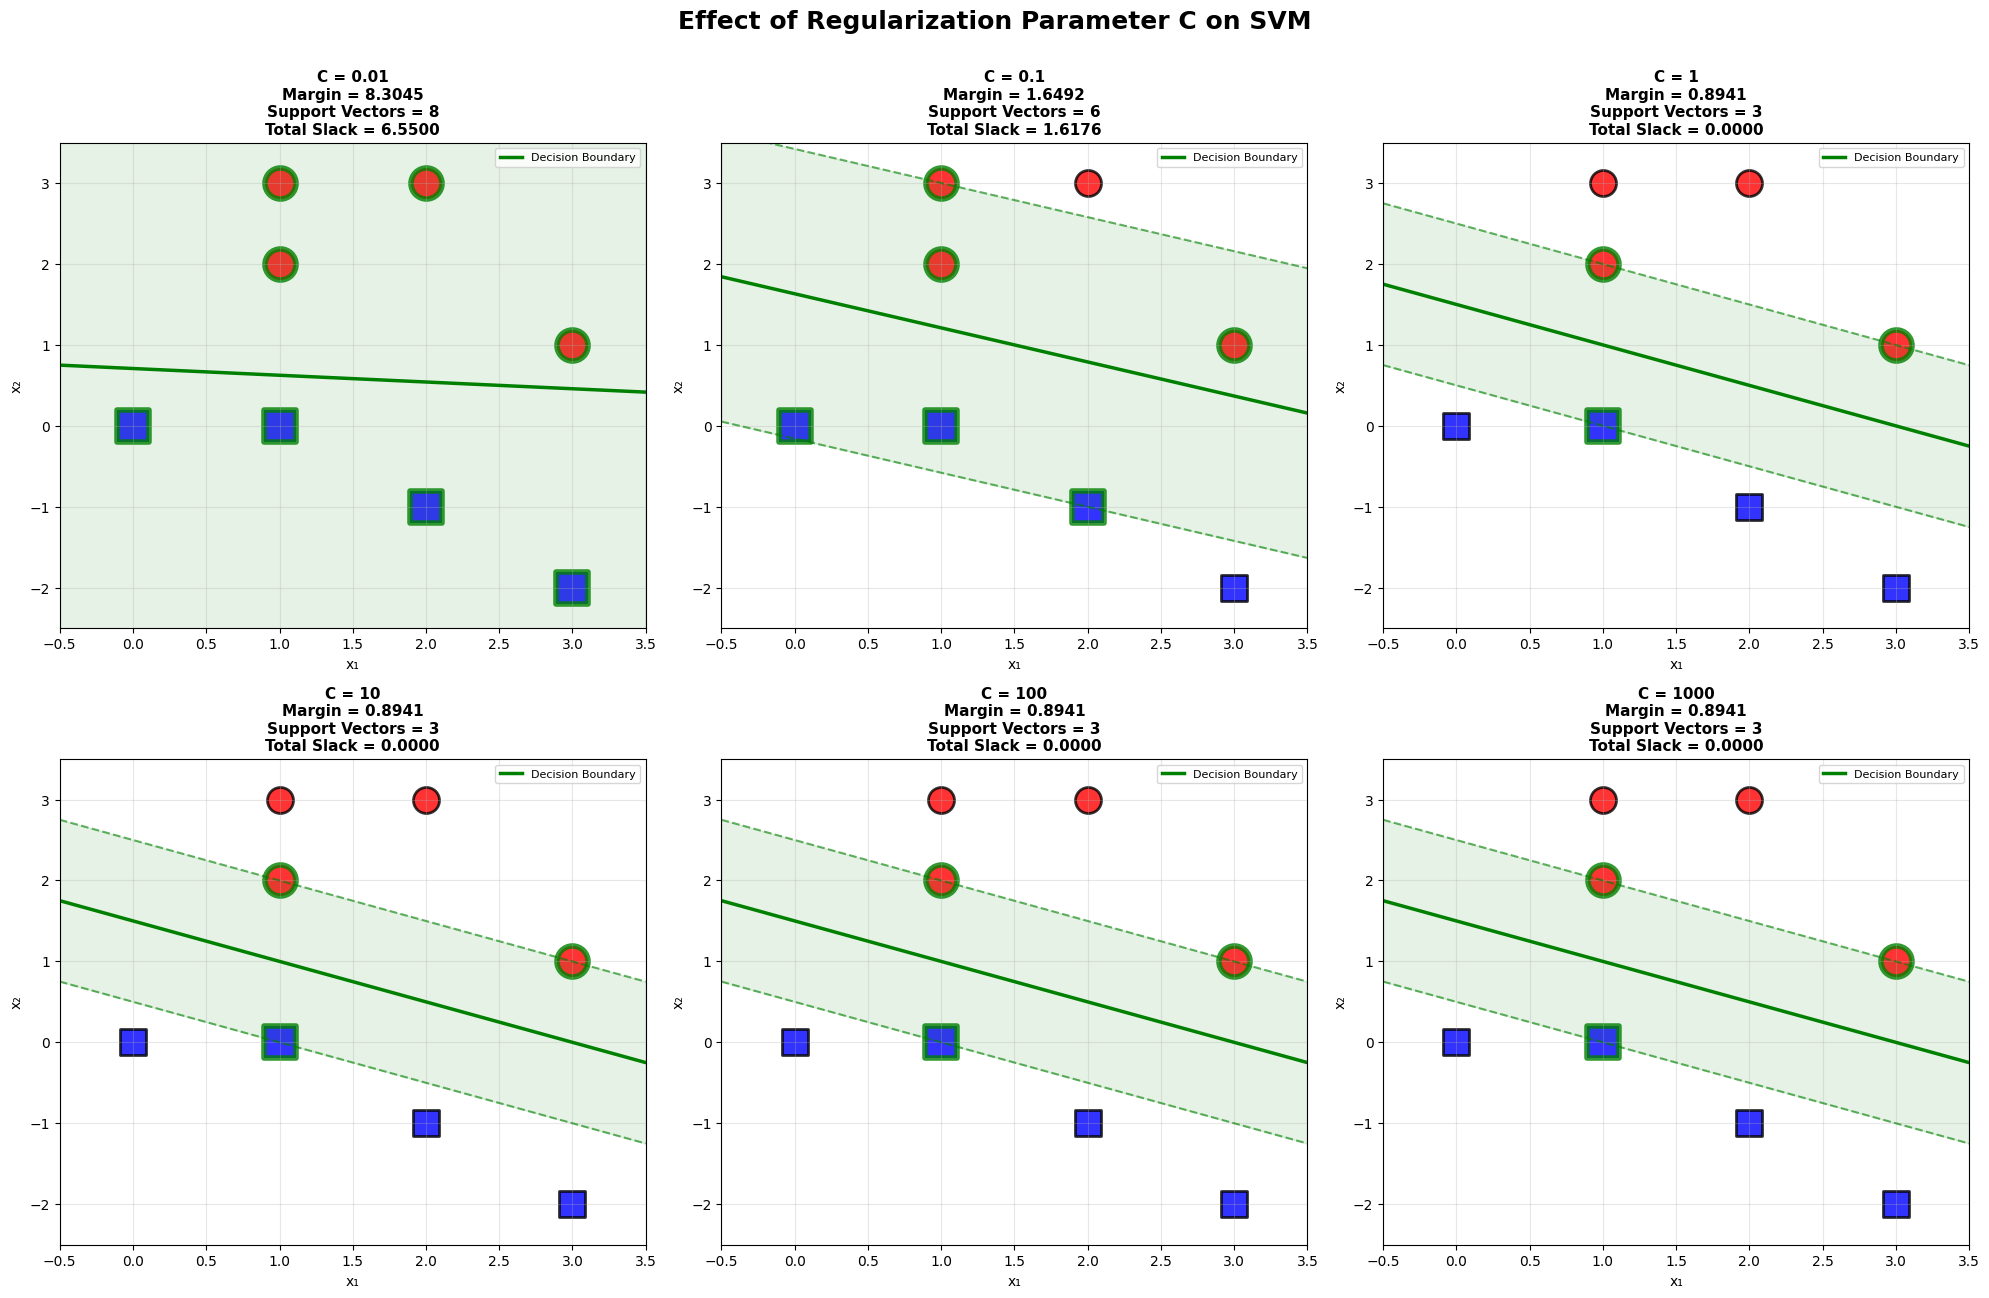

DETAILED COMPARISON OF C VALUES
C          Margin          Support Vectors    Total Slack     Misclassified
0.01       8.304548        8                  6.5500          0
0.1        1.649242        6                  1.6176          0
1          0.894078        3                  0.0000          0
10         0.894078        3                  0.0000          0
100        0.894078        3                  0.0000          0
1000       0.894078        3                  0.0000          0


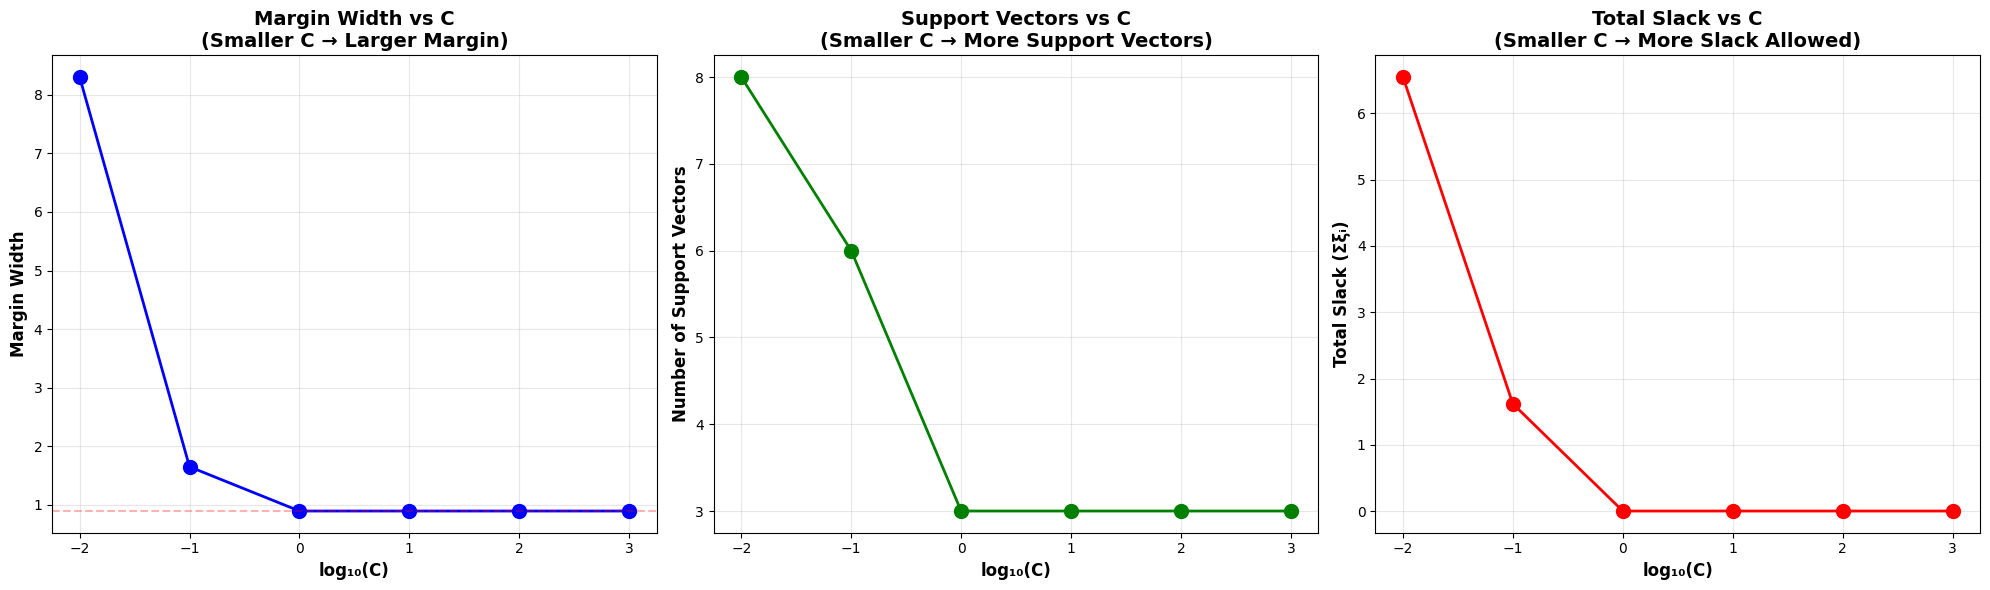

SUMMARY: THE BIAS-VARIANCE TRADE-OFF

┌─────────────────────────────────────────────────────────────────┐
│                    C → ∞ (Very Large)                           │
├─────────────────────────────────────────────────────────────────┤
│  • Hard-margin behavior                                         │
│  • Small margin, few support vectors                            │
│  • Low training error                                           │
│  • HIGH VARIANCE → Overfitting risk                             │
│  • Sensitive to outliers and noise                              │
└─────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────┐
│                    C → 0 (Very Small)                           │
├─────────────────────────────────────────────────────────────────┤
│  • Maximum margin priority                                      │
│  • Large margin, many support vectors                           │
│  • High

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

print("SVM TASK 4: EFFECT OF REGULARIZATION PARAMETER C")

# Dataset with new points
X = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0], [1, 3], [3, -2]])
y = np.array([1, 1, 1, -1, -1, -1, 1, -1])
print("\nObjective Function (Soft-Margin SVM):")

print("\nminimize: (1/2)||β||² + C·Σξᵢ")
print("\nsubject to:")
print("  • yᵢ(β·xᵢ + b) ≥ 1 - ξᵢ  for all i")
print("  • ξᵢ ≥ 0  for all i")

print("\nComponents:")
print("-" * 70)
print("1. (1/2)||β||²:")
print("   • Encourages LARGE MARGIN")
print("   • Minimizing ||β||² maximizes margin M = 1/||β||")
print("   • Promotes generalization")

print("\n2. C·Σξᵢ:")
print("   • Penalizes SLACK VARIABLES (violations)")
print("   • C controls the penalty strength")
print("   • Higher C = stronger penalty for violations")

print("\n3. yᵢ(β·xᵢ + b) ≥ 1 - ξᵢ:")
print("   • Soft constraint allowing violations")
print("   • ξᵢ measures how much point i violates the margin")
print("   • When ξᵢ = 0: hard constraint satisfied")

print("\n4. ξᵢ ≥ 0:")
print("   • Slack variables must be non-negative")

print("TASK 4: HOW DOES C AFFECT THE TRADE-OFF?")
print("HIGH C (e.g., C = 1000):")
print("  Objective: minimize (1/2)||β||² + 1000·Σξᵢ")
print("\n  Effect:")
print("  ✓ HEAVY penalty for slack variables")
print("  ✓ Forces ξᵢ → 0 (tries to eliminate violations)")
print("  ✓ Prioritizes CORRECT CLASSIFICATION over margin")
print("  ✓ Results in SMALLER margin")
print("\n  Behavior:")
print("  • Approaches hard-margin SVM")
print("  • Low bias, high variance")
print("  • Risk of OVERFITTING")
print("  • Less tolerant of outliers")
print("  • Decision boundary closely follows data")
print("LOW C (e.g., C = 0.01):")
print("  Objective: minimize (1/2)||β||² + 0.01·Σξᵢ")
print("\n  Effect:")
print("  ✓ SMALL penalty for slack variables")
print("  ✓ Allows larger ξᵢ (tolerates violations)")
print("  ✓ Prioritizes LARGE MARGIN over classification")
print("  ✓ Results in LARGER margin")
print("\n  Behavior:")
print("  • More violations allowed")
print("  • High bias, low variance")
print("  • Risk of UNDERFITTING")
print("  • More robust to noise and outliers")
print("  • Decision boundary is smoother")
print("MODERATE C (e.g., C = 1.0):")
print("  Objective: minimize (1/2)||β||² + 1·Σξᵢ")
print("\n  Effect:")
print("  ✓ BALANCED trade-off")
print("  ✓ Balances margin size and classification accuracy")
print("\n  Behavior:")
print("  • Best generalization performance")
print("  • Usually determined by cross-validation")
print("  • Adapts to data characteristics")

print("VISUALIZING DIFFERENT C VALUES")

C_values = [0.01, 0.1, 1, 10, 100, 1000]
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
axes = axes.flatten()

for idx, C in enumerate(C_values):
    ax = axes[idx]
    
    # Train SVM with specific C
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    # Get parameters
    beta = svm.coef_[0]
    beta0 = svm.intercept_[0]
    margin = 1 / np.linalg.norm(beta)
    
    # Calculate slack variables
    total_slack = 0
    for xi, yi in zip(X, y):
        margin_val = yi * (np.dot(beta, xi) + beta0)
        slack = max(0, 1 - margin_val)
        total_slack += slack
    
    # Plot points
    for i, (point, label) in enumerate(zip(X, y)):
        color = 'red' if label == 1 else 'blue'
        marker = 'o' if label == 1 else 's'
        
        # Highlight support vectors
        if i in svm.support_:
            size = 500
            edgecolor = 'green'
            linewidth = 4
        else:
            size = 350
            edgecolor = 'black'
            linewidth = 2
        
        ax.scatter(point[0], point[1], c=color, s=size, marker=marker, 
                  edgecolors=edgecolor, linewidths=linewidth, alpha=0.8)
    
    # Draw decision boundary and margins
    x_line = np.linspace(-0.5, 3.5, 100)
    y_decision = (-beta[0] * x_line - beta0) / beta[1]
    y_upper = (-beta[0] * x_line - beta0 + 1) / beta[1]
    y_lower = (-beta[0] * x_line - beta0 - 1) / beta[1]
    
    ax.plot(x_line, y_decision, 'g-', linewidth=2.5, label='Decision Boundary')
    ax.plot(x_line, y_upper, 'g--', linewidth=1.5, alpha=0.6)
    ax.plot(x_line, y_lower, 'g--', linewidth=1.5, alpha=0.6)
    ax.fill_between(x_line, y_lower, y_upper, alpha=0.1, color='green')
    
    # Styling
    title_lines = [
        f'C = {C}',
        f'Margin = {margin:.4f}',
        f'Support Vectors = {len(svm.support_)}',
        f'Total Slack = {total_slack:.4f}'
    ]
    ax.set_title('\n'.join(title_lines), fontsize=11, fontweight='bold')
    ax.set_xlabel('x₁', fontsize=10)
    ax.set_ylabel('x₂', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-2.5, 3.5)
    ax.legend(fontsize=8, loc='upper right')

plt.suptitle('Effect of Regularization Parameter C on SVM', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

print("DETAILED COMPARISON OF C VALUES")

results = []
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    
    beta = svm.coef_[0]
    beta0 = svm.intercept_[0]
    margin = 1 / np.linalg.norm(beta)
    n_support = len(svm.support_)
    
    # Calculate total slack
    total_slack = 0
    misclassified = 0
    for xi, yi in zip(X, y):
        margin_val = yi * (np.dot(beta, xi) + beta0)
        slack = max(0, 1 - margin_val)
        total_slack += slack
        if margin_val < 0:
            misclassified += 1
    
    results.append({
        'C': C,
        'margin': margin,
        'n_support': n_support,
        'total_slack': total_slack,
        'misclassified': misclassified
    })

print(f"{'C':<10} {'Margin':<15} {'Support Vectors':<18} {'Total Slack':<15} {'Misclassified'}")

for r in results:
    print(f"{r['C']:<10} {r['margin']:<15.6f} {r['n_support']:<18} {r['total_slack']:<15.4f} {r['misclassified']}")


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

C_log = [np.log10(r['C']) for r in results]
margins = [r['margin'] for r in results]
support_vectors = [r['n_support'] for r in results]
slacks = [r['total_slack'] for r in results]

# Plot 1: Margin vs C
ax = axes[0]
ax.plot(C_log, margins, 'bo-', linewidth=2, markersize=10)
ax.set_xlabel('log₁₀(C)', fontsize=12, fontweight='bold')
ax.set_ylabel('Margin Width', fontsize=12, fontweight='bold')
ax.set_title('Margin Width vs C\n(Smaller C → Larger Margin)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=margins[len(margins)//2], color='r', linestyle='--', alpha=0.3)

# Plot 2: Support Vectors vs C
ax = axes[1]
ax.plot(C_log, support_vectors, 'go-', linewidth=2, markersize=10)
ax.set_xlabel('log₁₀(C)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Support Vectors', fontsize=12, fontweight='bold')
ax.set_title('Support Vectors vs C\n(Smaller C → More Support Vectors)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot 3: Total Slack vs C
ax = axes[2]
ax.plot(C_log, slacks, 'ro-', linewidth=2, markersize=10)
ax.set_xlabel('log₁₀(C)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Slack (Σξᵢ)', fontsize=12, fontweight='bold')
ax.set_title('Total Slack vs C\n(Smaller C → More Slack Allowed)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("SUMMARY: THE BIAS-VARIANCE TRADE-OFF")
print("\n┌─────────────────────────────────────────────────────────────────┐")
print("│                    C → ∞ (Very Large)                           │")
print("├─────────────────────────────────────────────────────────────────┤")
print("│  • Hard-margin behavior                                         │")
print("│  • Small margin, few support vectors                            │")
print("│  • Low training error                                           │")
print("│  • HIGH VARIANCE → Overfitting risk                             │")
print("│  • Sensitive to outliers and noise                              │")
print("└─────────────────────────────────────────────────────────────────┘")

print("\n┌─────────────────────────────────────────────────────────────────┐")
print("│                    C → 0 (Very Small)                           │")
print("├─────────────────────────────────────────────────────────────────┤")
print("│  • Maximum margin priority                                      │")
print("│  • Large margin, many support vectors                           │")
print("│  • Higher training error allowed                                │")
print("│  • HIGH BIAS → Underfitting risk                                │")
print("│  • Robust to outliers and noise                                 │")
print("└─────────────────────────────────────────────────────────────────┘")

print("\n┌─────────────────────────────────────────────────────────────────┐")
print("│                    C ≈ 1 (Balanced)                             │")
print("├─────────────────────────────────────────────────────────────────┤")
print("│  • Balanced trade-off                                           │")
print("│  • Moderate margin and violations                               │")
print("│  • OPTIMAL GENERALIZATION (typically)                           │")
print("│  • Choose via cross-validation                                  │")
print("└─────────────────────────────────────────────────────────────────┘")

print("PRACTICAL GUIDELINES")


print("\n1. CHOOSING C:")
print("   • Start with C = 1.0")
print("   • Use cross-validation to find optimal C")
print("   • Try range: [0.001, 0.01, 0.1, 1, 10, 100, 1000]")
print("   • Grid search with log scale")

print("\n2. IF MODEL OVERFITS (high variance):")
print("   • Training accuracy >> Test accuracy")
print("   • Solution: DECREASE C")
print("   • Allows larger margin, more robust")

print("\n3. IF MODEL UNDERFITS (high bias):")
print("   • Both training and test accuracy low")
print("   • Solution: INCREASE C")
print("   • Fits training data more closely")

print("\n4. NOISY DATA:")
print("   • Use SMALLER C")
print("   • Allows model to ignore outliers")
print("   • More robust predictions")

print("\n5. CLEAN SEPARABLE DATA:")
print("   • Can use LARGER C")
print("   • Approaches hard-margin solution")
print("   • Tighter decision boundary")

print("TASK 4 COMPLETED!")

print("\nKey Takeaway:")
print("  C controls the TRADE-OFF between:")
print("    1. Maximizing the margin (generalization)")
print("    2. Minimizing classification errors (training accuracy)")
print("\n  The optimal C depends on:")
print("    • Data characteristics (noise, separability)")
print("    • Balance between bias and variance")
print("    • Should be selected via cross-validation")